CONTEXT

CONTEXT

Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat memprediksi kemungkinan klaim asuransi perjalanan berdasarkan data historis pelanggan dan informasi terkait polis asuransi yang mereka beli. Klaim asuransi perjalanan bisa mencakup berbagai kejadian yang tidak terduga selama perjalanan, seperti pembatalan perjalanan, kecelakaan, atau kehilangan barang.

Seiring dengan meningkatnya jumlah pelanggan dan transaksi asuransi perjalanan, perusahaan asuransi sering menghadapi tantangan dalam mengelola klaim dengan biaya dan waktu yang efisien. Salah satu tantangan utama adalah mengidentifikasi klaim yang berpotensi valid dan yang tidak relevan sehingga dapat mengurangi biaya pemeriksaan klaim yang tidak perlu.

Data yang digunakan dalam proyek ini mencakup berbagai fitur, seperti jenis agen asuransi, jenis produk asuransi, durasi perjalanan, komisi agen, dan demografi pelanggan. Tujuan proyek ini adalah untuk membantu perusahaan asuransi dalam membuat keputusan yang lebih tepat dan efisien, serta mengurangi risiko keuangan yang terkait dengan klaim yang tidak terduga atau klaim palsu.

BUSSINESS PROBLEM

Perusahaan asuransi perjalanan sering kali menghadapi tantangan besar dalam mengelola klaim yang masuk, terutama dalam mengidentifikasi klaim yang benar-benar sah dan klaim yang tidak relevan atau palsu. Tanpa sistem yang dapat memprediksi klaim yang kemungkinan besar valid, perusahaan harus memeriksa semua klaim secara manual, yang menghabiskan waktu dan sumber daya.

Masalah utama yang ingin diselesaikan adalah:

Ketidakseimbangan Kelas: Klaim yang terjadi jauh lebih sedikit dibandingkan klaim yang tidak terjadi, sehingga model cenderung bias terhadap klaim yang tidak terjadi. Hal ini membuat model kesulitan untuk mendeteksi klaim yang sebenarnya terjadi (kelas minoritas).
Penyaringan Klaim Tidak Relevan: Tanpa model yang akurat, perusahaan sering kali menghabiskan banyak waktu dan biaya untuk memproses klaim yang tidak valid. Ini mengarah pada pengeluaran yang tinggi dan penurunan efisiensi operasional.
Pengelolaan Risiko: Perusahaan harus mengelola risiko keuangan terkait dengan klaim yang tidak terduga. Dengan adanya model prediksi, perusahaan dapat mengurangi pengeluaran yang tidak perlu dan lebih efisien dalam merencanakan alokasi dana untuk klaim yang sah.

GOALS

Tujuan dari proyek ini adalah untuk membangun model machine learning yang dapat memprediksi klaim asuransi perjalanan berdasarkan data yang ada, sehingga perusahaan dapat:

Mengurangi biaya operasional dalam memproses klaim yang tidak relevan.
Meningkatkan efisiensi pengelolaan klaim dengan memfokuskan sumber daya pada klaim yang memiliki potensi validitas yang lebih tinggi.
Memperkirakan klaim yang mungkin terjadi agar perusahaan dapat menyesuaikan harga premi dan alokasi dana untuk klaim dengan lebih tepat.
Membantu perusahaan dalam mengelola risiko finansial yang terkait dengan klaim asuransi yang tidak terduga atau berisiko tinggi.

BUSSINESS IMPACT

Efisiensi: Dengan model prediksi yang tepat, perusahaan dapat mengurangi waktu yang dihabiskan untuk memproses klaim yang tidak relevan, sehingga menghemat biaya operasional dan meningkatkan produktivitas tim klaim.
Penghematan Biaya: Mengurangi klaim yang tidak relevan berarti mengurangi biaya yang terbuang untuk memproses klaim yang tidak sah, yang dapat mencapai penghematan besar dalam jangka panjang.
Peningkatan Keakuratan Prediksi: Dengan memanfaatkan teknologi machine learning, perusahaan bisa menyaring klaim dengan lebih cermat, sehingga hanya klaim yang berpotensi tinggi yang diproses lebih lanjut.
Strategi Penyesuaian Premi: Berdasarkan model prediksi klaim, perusahaan bisa menyesuaikan harga premi bagi pelanggan dengan risiko klaim yang lebih tinggi, yang dapat membantu menjaga kestabilan finansial perusahaan.

In [437]:
## LIBRARY

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, joblib
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer, PowerTransformer, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, roc_auc_score
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from scipy.stats import probplot
from feature_engine.encoding import OneHotEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif, RFE
from skopt import BayesSearchCV

LOAD DATA

In [438]:
# Load the dataset
df = pd.read_csv('/Users/mhusnimaulana/Downloads/data_travel_insurance.csv') 
df


Agency    Agency Type Distribution Channel  \
0        C2B       Airlines               Online   
1        EPX  Travel Agency               Online   
2        JZI       Airlines               Online   
3        EPX  Travel Agency               Online   
4        C2B       Airlines               Online   
...      ...            ...                  ...   
44323    EPX  Travel Agency               Online   
44324    CWT  Travel Agency               Online   
44325    TST  Travel Agency              Offline   
44326    EPX  Travel Agency               Online   
44327    CWT  Travel Agency               Online   

                          Product Name Gender  Duration    Destination  \
0                   Annual Silver Plan      F       365      SINGAPORE   
1                    Cancellation Plan    NaN         4       MALAYSIA   
2                           Basic Plan      M        19          INDIA   
3             2 way Comprehensive Plan    NaN        20  UNITED STATES   
4                          Bronze Plan      M         8      SINGAPORE   
...                                ...    ...       ...            ...   
44323         2 way Comprehensive Plan    NaN        14          CHINA   
44324  Rental Vehicle Excess Insurance    NaN        17      AUSTRALIA   
44325            Travel Cruise Protect      M        64       THAILAND   
44326         2 way Comprehensive Plan    NaN        51          CHINA   
44327  Rental Vehicle Excess Insurance    NaN       172      SINGAPORE   

       Net Sales  Commision (in value)  Age Claim  
0          216.0                 54.00   57    No  
1           10.0                  0.00   33    No  
2           22.0                  7.70   26    No  
3          112.0                  0.00   59    No  
4           16.0                  4.00   28    No  
...          ...                   ...  ...   ...  
44323       30.0                  0.00   36   Yes  
44324       79.2                 47.52   47    No  
44325       30.0                 10.50   50    No  
44326       36.0                  0.00   36    No  
44327        0.0                 17.82   31    No  

[44328 rows x 11 columns]

Data ini memiliki 44328 baris dan 11 kolom. Kemudian kita akan lihat struktur dan datatype-nya

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


untuk mempermudah membaca kolom, kolom Commossion (in value) saya ganti menjadi 'commission'

In [440]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.rename(columns={'commision_(in_value)':'commission'}, inplace=True)
df

agency    agency_type distribution_channel  \
0        C2B       Airlines               Online   
1        EPX  Travel Agency               Online   
2        JZI       Airlines               Online   
3        EPX  Travel Agency               Online   
4        C2B       Airlines               Online   
...      ...            ...                  ...   
44323    EPX  Travel Agency               Online   
44324    CWT  Travel Agency               Online   
44325    TST  Travel Agency              Offline   
44326    EPX  Travel Agency               Online   
44327    CWT  Travel Agency               Online   

                          product_name gender  duration    destination  \
0                   Annual Silver Plan      F       365      SINGAPORE   
1                    Cancellation Plan    NaN         4       MALAYSIA   
2                           Basic Plan      M        19          INDIA   
3             2 way Comprehensive Plan    NaN        20  UNITED STATES   
4                          Bronze Plan      M         8      SINGAPORE   
...                                ...    ...       ...            ...   
44323         2 way Comprehensive Plan    NaN        14          CHINA   
44324  Rental Vehicle Excess Insurance    NaN        17      AUSTRALIA   
44325            Travel Cruise Protect      M        64       THAILAND   
44326         2 way Comprehensive Plan    NaN        51          CHINA   
44327  Rental Vehicle Excess Insurance    NaN       172      SINGAPORE   

       net_sales  commission  age claim  
0          216.0       54.00   57    No  
1           10.0        0.00   33    No  
2           22.0        7.70   26    No  
3          112.0        0.00   59    No  
4           16.0        4.00   28    No  
...          ...         ...  ...   ...  
44323       30.0        0.00   36   Yes  
44324       79.2       47.52   47    No  
44325       30.0       10.50   50    No  
44326       36.0        0.00   36    No  
44327        0.0       17.82   31    No  

[44328 rows x 11 columns]

In [441]:
# Ubah kolom 'claim' menjadi binary
df['claim'] = df['claim'].apply(lambda x: 1 if x == 'Yes' else 0)

# Cek hasil perubahan
print(df['claim'].value_counts())
df


claim
0    43651
1      677
Name: count, dtype: int64


agency    agency_type distribution_channel  \
0        C2B       Airlines               Online   
1        EPX  Travel Agency               Online   
2        JZI       Airlines               Online   
3        EPX  Travel Agency               Online   
4        C2B       Airlines               Online   
...      ...            ...                  ...   
44323    EPX  Travel Agency               Online   
44324    CWT  Travel Agency               Online   
44325    TST  Travel Agency              Offline   
44326    EPX  Travel Agency               Online   
44327    CWT  Travel Agency               Online   

                          product_name gender  duration    destination  \
0                   Annual Silver Plan      F       365      SINGAPORE   
1                    Cancellation Plan    NaN         4       MALAYSIA   
2                           Basic Plan      M        19          INDIA   
3             2 way Comprehensive Plan    NaN        20  UNITED STATES   
4                          Bronze Plan      M         8      SINGAPORE   
...                                ...    ...       ...            ...   
44323         2 way Comprehensive Plan    NaN        14          CHINA   
44324  Rental Vehicle Excess Insurance    NaN        17      AUSTRALIA   
44325            Travel Cruise Protect      M        64       THAILAND   
44326         2 way Comprehensive Plan    NaN        51          CHINA   
44327  Rental Vehicle Excess Insurance    NaN       172      SINGAPORE   

       net_sales  commission  age  claim  
0          216.0       54.00   57      0  
1           10.0        0.00   33      0  
2           22.0        7.70   26      0  
3          112.0        0.00   59      0  
4           16.0        4.00   28      0  
...          ...         ...  ...    ...  
44323       30.0        0.00   36      1  
44324       79.2       47.52   47      0  
44325       30.0       10.50   50      0  
44326       36.0        0.00   36      0  
44327        0.0       17.82   31      0  

[44328 rows x 11 columns]

In [442]:
df.isna().sum()

agency                      0
agency_type                 0
distribution_channel        0
product_name                0
gender                  31647
duration                    0
destination                 0
net_sales                   0
commission                  0
age                         0
claim                       0
dtype: int64

Terdapat 31647 missing values (Nan) pada kolom gender ini hampir 71% data. Menghapus atau mengisi missing values akan sangat sensitif dan menimbulkan bias juga merusak model yang akan di buat. Sehingga saya putuskan unutk mengisi missiang values dengan modus, mencari data yang paling banyak.

In [443]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)


In [444]:
df.isna().sum()

agency                  0
agency_type             0
distribution_channel    0
product_name            0
gender                  0
duration                0
destination             0
net_sales               0
commission              0
age                     0
claim                   0
dtype: int64

Hasilnya data tetap utuh dan tidak ada lagi missing values. Selanjutnya saya akan mengecek duplikasi data

In [445]:
# Menghapus duplikasi data
df = df.drop_duplicates()
print(f"Ukuran data setelah menghapus duplikasi: {df.shape}")

# Cek apakah ada duplikasi setelah dihapus
print("\nJumlah duplikasi setelah dihapus:", df.duplicated().sum())

# Tampilkan beberapa baris pertama untuk memastikan
print("\nBeberapa baris pertama setelah menghapus duplikasi:")
print(df.head())


Ukuran data setelah menghapus duplikasi: (39643, 11)

Jumlah duplikasi setelah dihapus: 0

Beberapa baris pertama setelah menghapus duplikasi:
  agency    agency_type distribution_channel              product_name gender  \
0    C2B       Airlines               Online        Annual Silver Plan      F   
1    EPX  Travel Agency               Online         Cancellation Plan      M   
2    JZI       Airlines               Online                Basic Plan      M   
3    EPX  Travel Agency               Online  2 way Comprehensive Plan      M   
4    C2B       Airlines               Online               Bronze Plan      M   

   duration    destination  net_sales  commission  age  claim  
0       365      SINGAPORE      216.0        54.0   57      0  
1         4       MALAYSIA       10.0         0.0   33      0  
2        19          INDIA       22.0         7.7   26      0  
3        20  UNITED STATES      112.0         0.0   59      0  
4         8      SINGAPORE       16.0         4.0 

Dengan menghapus 10.68% data terduplikasi, saya akan memastikan data yang digunakan dalam model benar-benar representatif dan dapat diandalkan, meningkatkan kualitas dan efektivitas model dalam memprediksi klaim dengan lebih akurat.

In [446]:
df.describe()

duration     net_sales    commission           age         claim
count  39643.000000  39643.000000  39643.000000  39643.000000  39643.000000
mean      52.417854     42.353443     10.443985     39.922332      0.017027
std      113.564631     50.033848     20.360349     13.505884      0.129373
min       -1.000000   -357.500000      0.000000      0.000000      0.000000
25%       11.000000     19.000000      0.000000     34.000000      0.000000
50%       25.000000     29.000000      0.000000     36.000000      0.000000
75%       57.000000     50.000000     11.880000     45.000000      0.000000
max     4881.000000    810.000000    283.500000    118.000000      1.000000

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39643 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                39643 non-null  object 
 1   agency_type           39643 non-null  object 
 2   distribution_channel  39643 non-null  object 
 3   product_name          39643 non-null  object 
 4   gender                39643 non-null  object 
 5   duration              39643 non-null  int64  
 6   destination           39643 non-null  object 
 7   net_sales             39643 non-null  float64
 8   commission            39643 non-null  float64
 9   age                   39643 non-null  int64  
 10  claim                 39643 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


Saya akan melakukan atau menormalisasi data dengan logis, seperti menghapus nilai negatif netsales, durasi, membuat batasan usia sesuia kebijakan perusahaan asurnsi pada umumnya

In [448]:
df = df[df.net_sales >= 0]
df.shape

(39165, 11)

Net sales (penjualan bersih) seharusnya tidak bernilai negatif, karena ini merujuk pada pendapatan dari premi yang dibayar oleh pelanggan. Nilai negatif bisa menunjukkan kesalahan data, seperti pengembalian atau refund yang tidak relevan dalam analisis ini. Tujuan menghapus nilai negatif unutk menjaga konsistensi data dengan memastikan hanya transaksi penjualan yang valid (positif atau nol) yang dihitung dalam model.

In [449]:
# Filter data untuk memastikan durasi dalam rentang yang valid (min 6 jam dan max 183 hari)
df = df[(df.duration >= 0.25) & (df.duration <= 183)]

# Menampilkan shape dataset setelah filter
df.shape


(37001, 11)

durasi perjalanan harus memiliki nilai yang valid, yaitu waktu perjalanan dalam angka positif. Nilai negatif tidak masuk akal dalam konteks ini, karena durasi perjalanan tidak mungkin kurang dari 0. Memastikan bahwa hanya data dengan durasi perjalanan yang valid (lebih besar atau sama dengan 0) yang dimasukkan ke dalam dataset. Namun setelah saya membaca beberapa risalah asuransi perjalanan, durasi yang bisa di cover oleh asuransi adalah minimal 6 jam, dan maksimal 183 hari.


In [450]:
# Mengganti nilai NaN pada kolom 'gender' dengan modus (nilai yang paling sering muncul)
mode_gender = df['gender'].mode()  # Ambil nilai modus
mode_gender_value = mode_gender.iloc[0]  # Ambil nilai pertama jika ada lebih dari satu modus

# Mengganti NaN dengan modus
df['gender'] = df['gender'].fillna(mode_gender_value)

# Memeriksa apakah masih ada nilai NaN di kolom 'gender'
print(df['gender'].isna().sum())


0


Pemilihan modus memastikan bahwa kategori yang dominan diwakili dengan proporsi yang sesuai dalam data dan mencegah perubahan distribusi yang bisa merugikan akurasi model.

In [451]:
df.isnull().sum()

agency                  0
agency_type             0
distribution_channel    0
product_name            0
gender                  0
duration                0
destination             0
net_sales               0
commission              0
age                     0
claim                   0
dtype: int64

In [452]:
df = df[(df.age >= 0.25) & (df.age <= 80)]  # 0.25 tahun = 3 bulan
df.shape


(36481, 11)

Usia seharusnya berada dalam rentang yang realistis untuk travel insurance (menurut informasi google), yaitu antara 3 bulan dan 80 tahun. Nilai usia di atas 100 tahun kemungkinan besar adalah kesalahan input atau outlier yang tidak relevan dalam konteks analisis. Menghapus baris dengan usia yang tidak realistis untuk menjaga integritas dataset dan mencegah model mengambil keputusan berdasarkan nilai yang tidak mungkin.

In [453]:
df.describe()

duration     net_sales    commission           age         claim
count  36481.000000  36481.000000  36481.000000  36481.000000  36481.000000
mean      35.273732     36.845417      8.055294     38.820975      0.014227
std       35.416869     30.936821     14.999535     10.213824      0.118425
min        1.000000      0.000000      0.000000      1.000000      0.000000
25%       10.000000     19.000000      0.000000     34.000000      0.000000
50%       22.000000     27.000000      0.000000     36.000000      0.000000
75%       48.000000     47.000000     10.500000     43.000000      0.000000
max      183.000000    682.000000    184.140000     80.000000      1.000000

Berdasarkan hasil visualisasi distribusi durasi perjalanan, dapat dilihat bahwa sebagian besar data memiliki durasi yang relatif pendek. Namun, terdapat beberapa nilai durasi yang sangat tinggi (melebihi 183 hari), yang tampaknya tidak realistis untuk perjalanan asuransi. Untuk itu, dilakukan pembersihan data dengan memfilter durasi perjalanan yang hanya antara 6 jam (0.25 hari) hingga 183 hari. Hal ini bertujuan untuk menjaga kualitas data dan memastikan bahwa hanya durasi perjalanan yang realistis dan relevan yang digunakan dalam analisis lebih lanjut.

Setelah dilakukan pembersihan, dataset hanya mencakup data dengan durasi perjalanan yang wajar, yang akan memperbaiki keakuratan model machine learning yang dibangun.

Exploratory Data Analysis (EDA)

DISTRIBUSI DATA

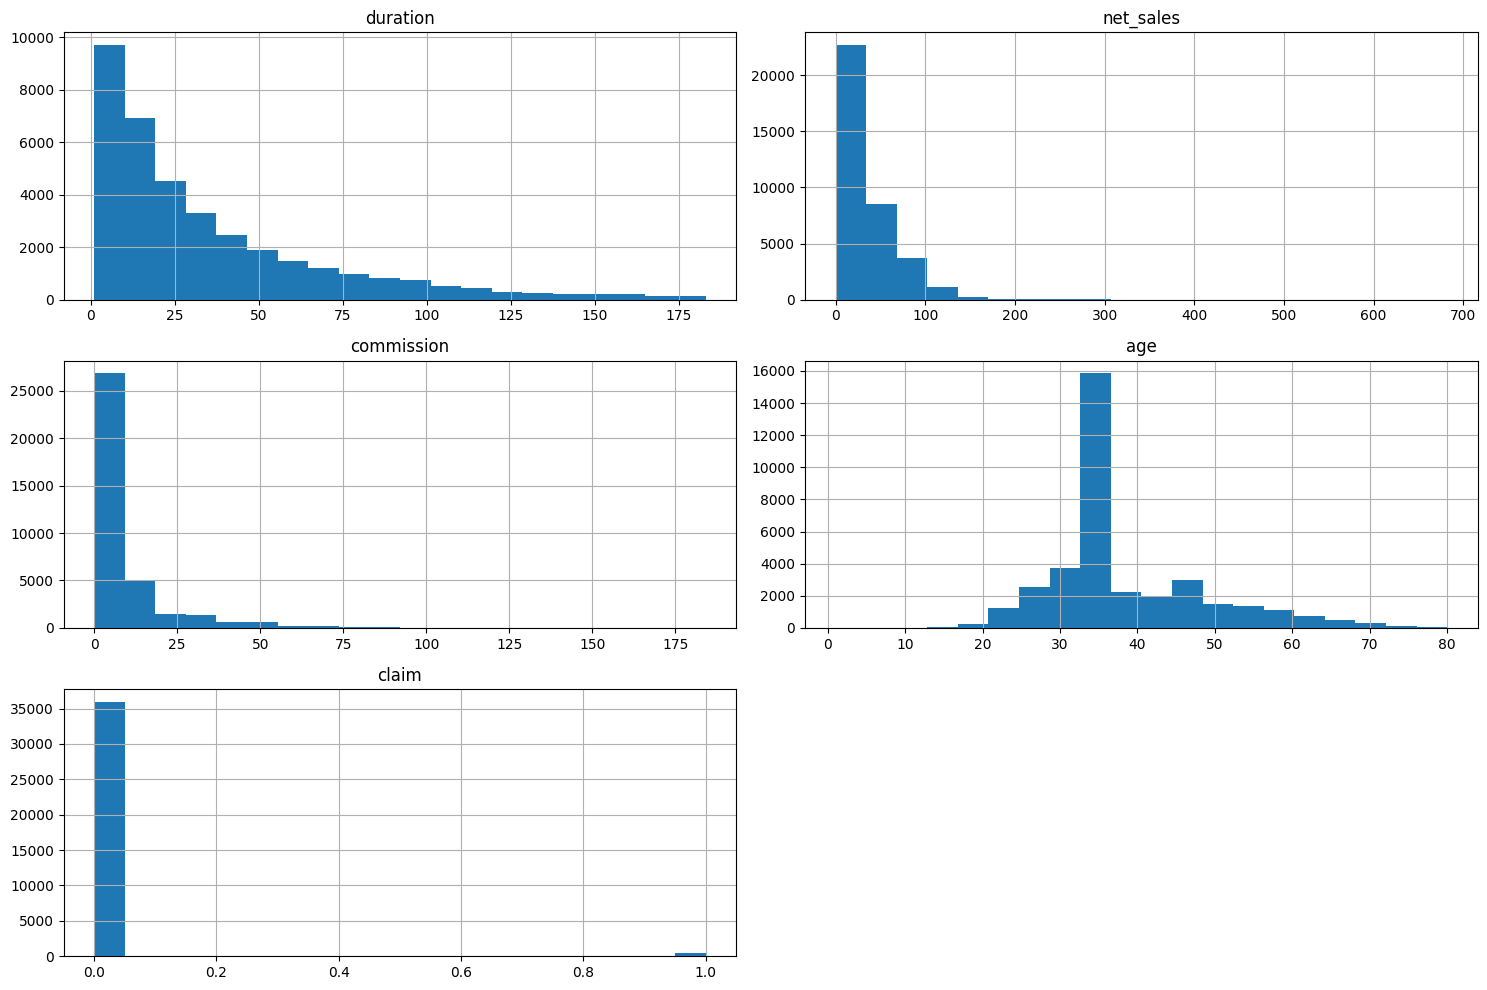

In [454]:
# Menampilkan histogram untuk setiap kolom numerik
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

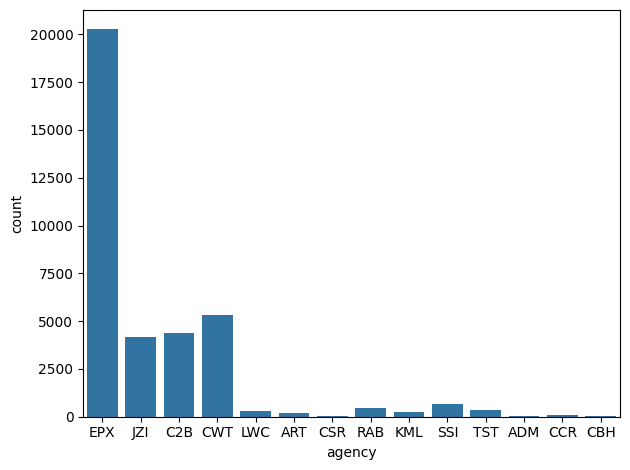

In [455]:
sns.countplot(data=df,x='agency')
plt.tight_layout();

Data ini menunjukkan bahwa sebagian besar tertanggung memilih untuk membeli asuransi perjalanan melalui agen perjalanan dengan nama EPX, yang berarti bahwa agen ini mungkin memiliki pengaruh atau jangkauan yang lebih besar dibandingkan dengan agen lainnya dalam dataset.

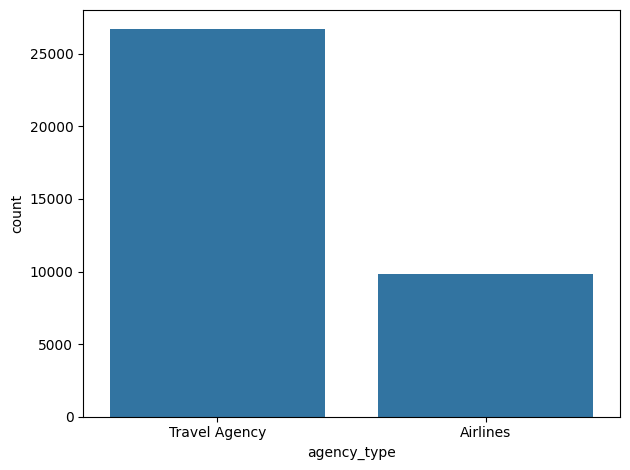

In [456]:
sns.countplot(data=df,x='agency_type')
plt.tight_layout();

ini menunjukkan bahwa sebagian besar pelanggan dalam dataset telah membeli produk asuransi perjalanan melalui berbagai agen perjalanan. Hal ini menunjukkan pentingnya peran agen perjalanan dalam distribusi produk asuransi.

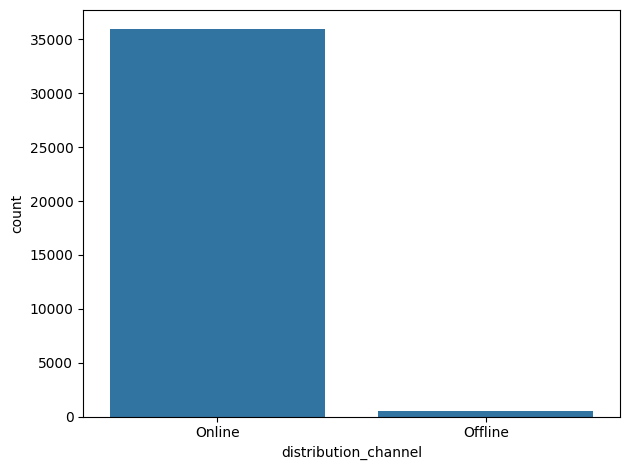

In [457]:
sns.countplot(data=df,x='distribution_channel')
plt.tight_layout();

mayoritas agen asuransi perjalanan lebih memilih saluran distribusi online untuk menjangkau pelanggan, sementara hanya sebagian kecil yang masih mengandalkan distribusi offline. Ini mencerminkan pergeseran tren ke arah digitalisasi dalam industri asuransi perjalanan.

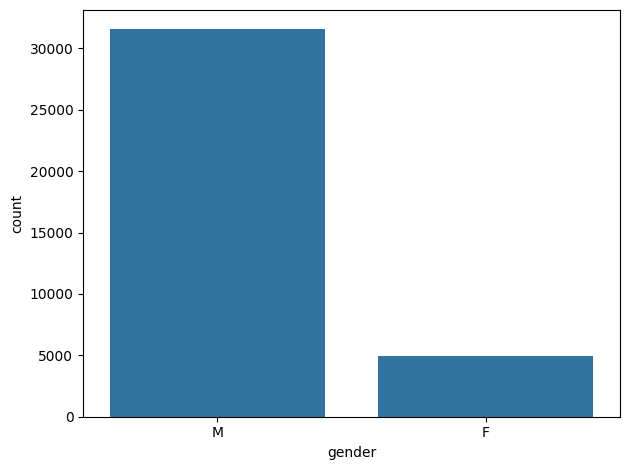

In [458]:
sns.countplot(data=df,x='gender')
plt.tight_layout();

Sebagian besar populasi pelanggan asuransi perjalanan adalah pria. 

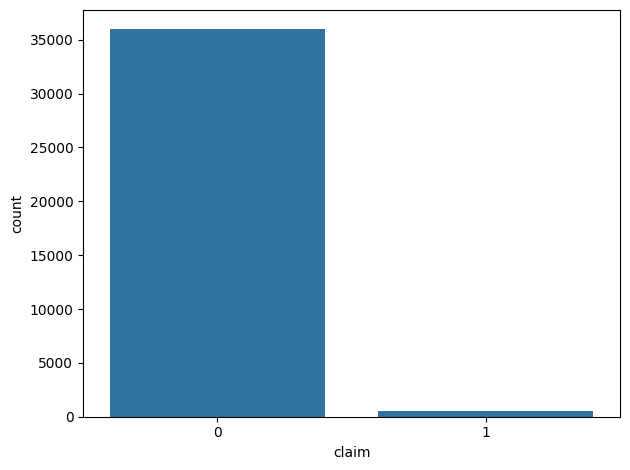

In [459]:
sns.countplot(data=df,x='claim')
plt.tight_layout();

Klaim asuransi perjalanan dari mayoritas pelanggan ditolak oleh agen asuransi. Hanya sejumlah kecil klaim asuransi yang diterima. Hal ini menunjukkan bahwa dataset ini sangat tidak seimbang (imbalanced), yang perlu diatasi nanti agar tidak mempengaruhi kinerja algoritma machine learning secara negatif.

FEATURE ENGINERING

Skewness of duration: 1.673950770318658
Kurtosis of duration: 2.6390910054942083


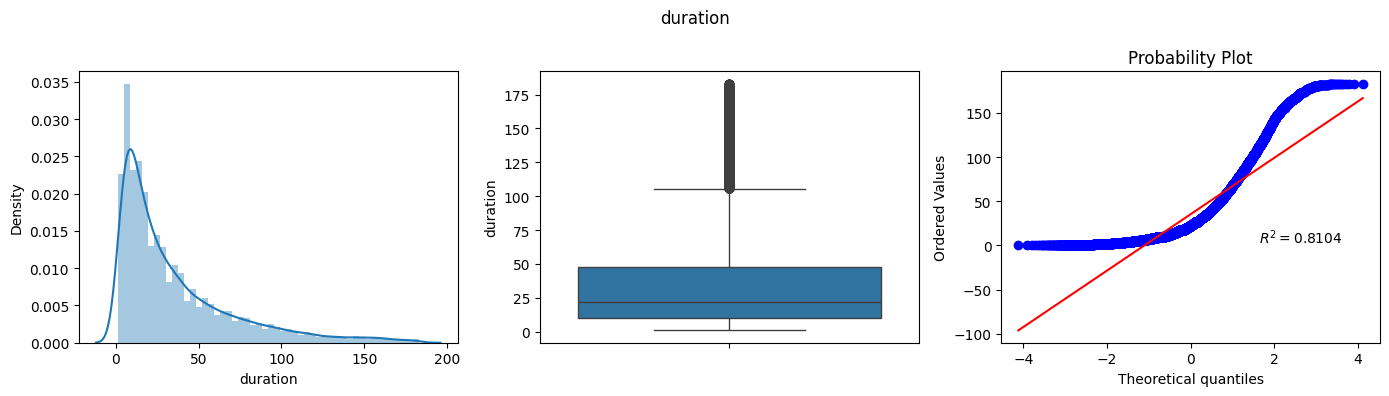

Skewness of net_sales: 3.0708181455643073
Kurtosis of net_sales: 26.113617463769767


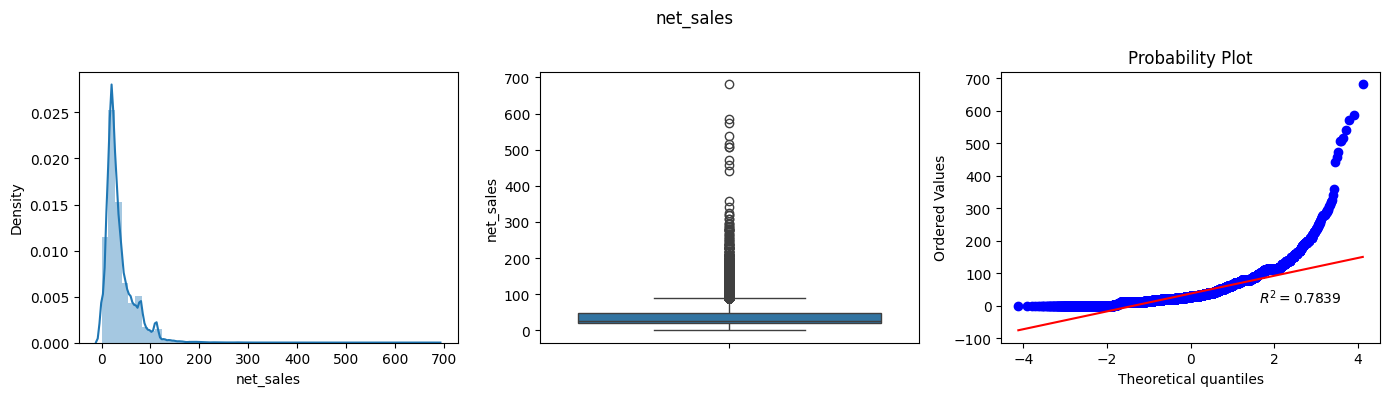

Skewness of commission: 3.339644441861607
Kurtosis of commission: 16.386338421094976


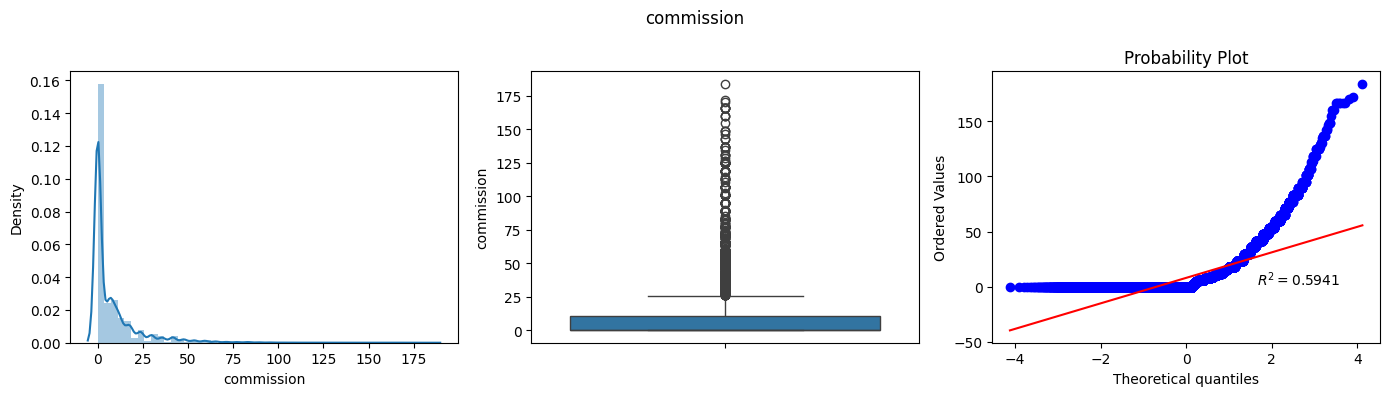

Skewness of age: 1.0623828447927774
Kurtosis of age: 1.3457501959750866


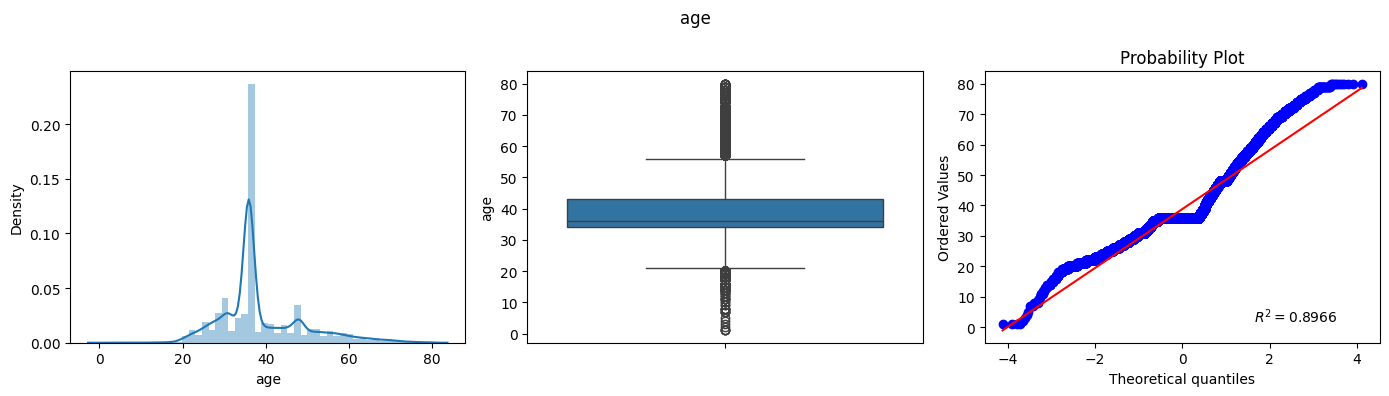

Skewness of claim: 8.204322717819029
Kurtosis of claim: 65.31449199534178


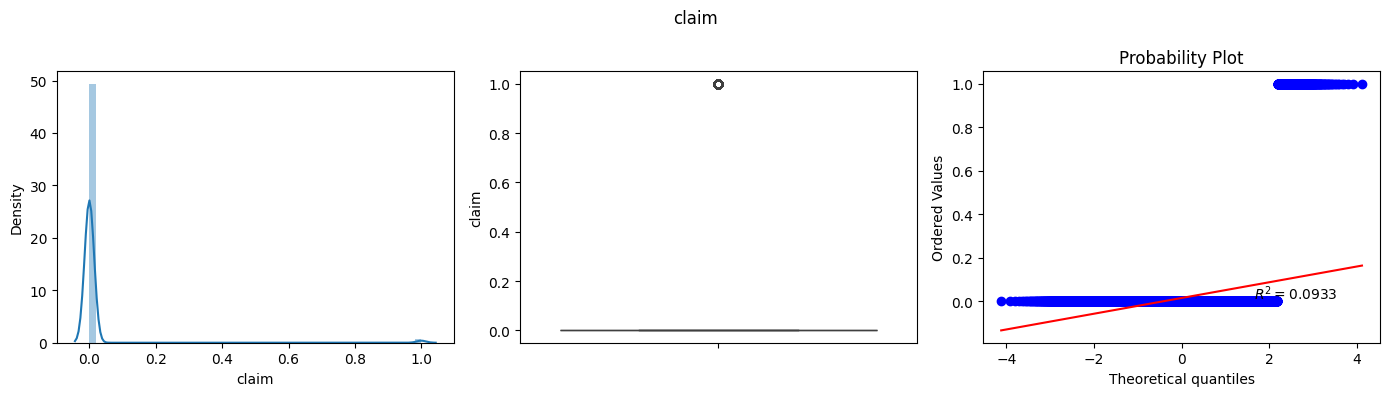

In [460]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],plot=plt,rvalue=True,dist='norm')
    plt.suptitle(col)
    plt.tight_layout()
    plt.show();

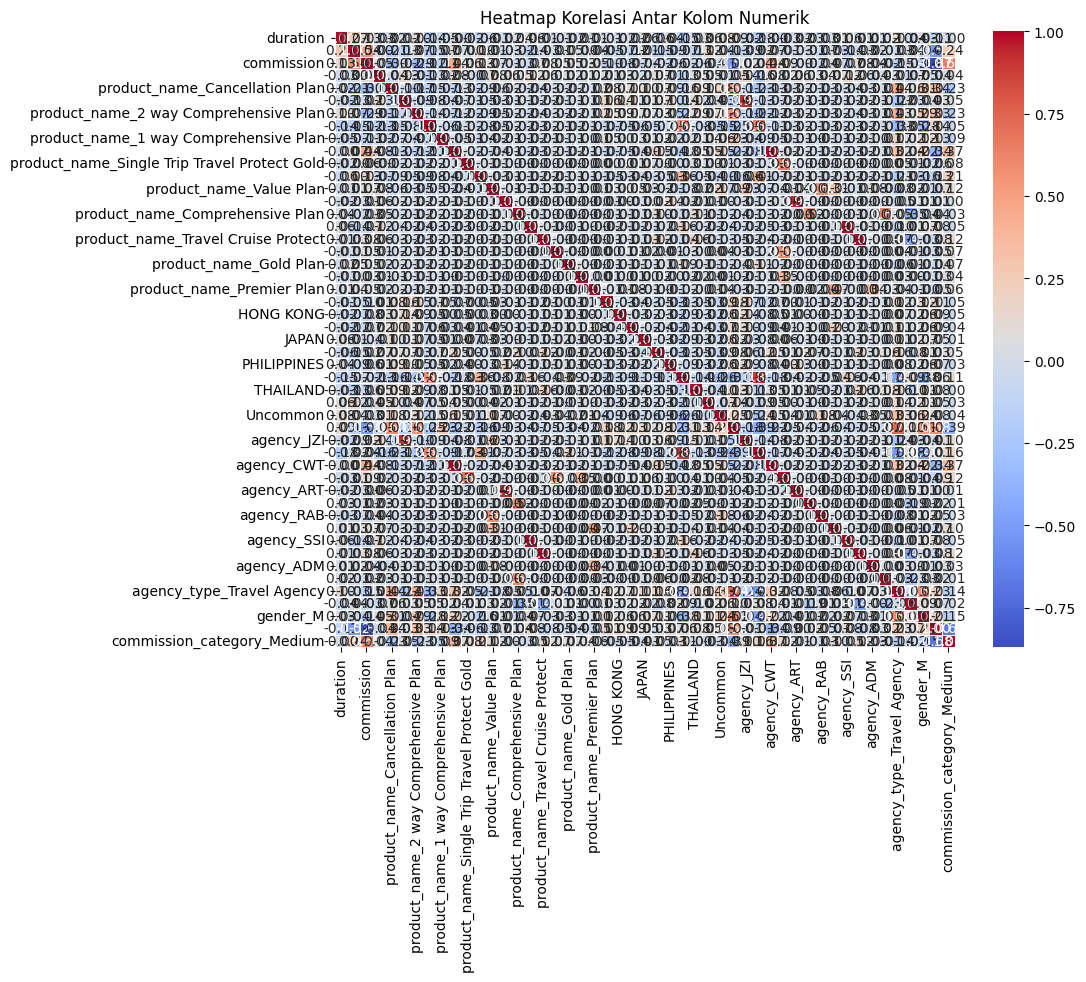

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Memilih hanya kolom numerik
numeric_cols = X.select_dtypes(include=['float64', 'int64'])

# 2. Menghitung korelasi antar kolom numerik
correlation_matrix = numeric_cols.corr()

# 3. Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))  # Menentukan ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menampilkan heatmap
plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()


net_sales & commission memiliki korelasi positif meski tidak terlalu signifikan mendekati moderat. Tapi paling positif di antara yang lain.

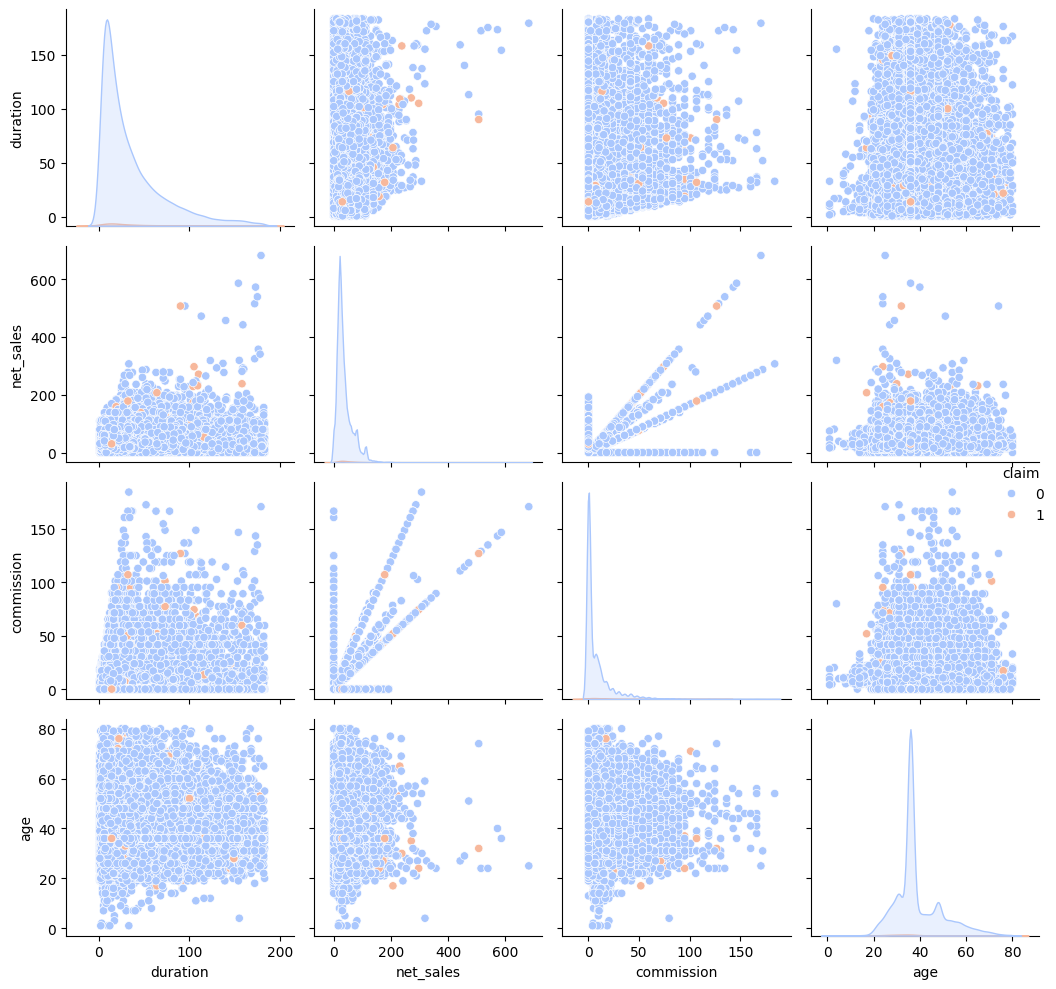

In [337]:
sns.pairplot(df,hue='claim',palette='coolwarm')
plt.tight_layout();

Distribusi per Fitur (diagonal):
duration: Kolom ini memiliki sebaran yang sangat condong ke kiri, menunjukkan sebagian besar transaksi memiliki durasi yang pendek. Ada beberapa nilai ekstrem yang jauh lebih tinggi daripada nilai rata-rata.
net_sales: Sebagian besar nilai berkisar pada angka yang lebih rendah dengan beberapa nilai yang sangat tinggi.
commission: Distribusinya mirip dengan net_sales, memiliki nilai yang cenderung rendah tetapi dengan beberapa ekstrem yang lebih tinggi.
age: Distribusi usia tampaknya lebih simetris, meskipun juga cenderung mengumpul di sekitar nilai tengah.
Hubungan Antar Variabel (off-diagonal):
net_sales dan commission: Ada korelasi positif yang jelas. Ini menunjukkan bahwa komisi cenderung meningkat seiring dengan peningkatan penjualan netto. Pola ini menunjukkan bahwa keduanya mungkin terkait dengan mekanisme harga atau komisi.
duration dan age: Tidak terlihat adanya pola korelasi yang jelas, menunjukkan bahwa durasi polis tidak terkait langsung dengan usia pelanggan.
age dan commission: Tidak ada hubungan yang signifikan antara usia pelanggan dan komisi yang diterima, menunjukkan bahwa komisi tidak dipengaruhi oleh usia pelanggan.

FEATURE TRANSFORMATION

In [338]:
def apply_transform(transformer,col):
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(f"{col} Before Transform")
    plt.tight_layout()
    plt.show()
    col_tf = transformer.fit_transform(df[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(col_tf)
    plt.subplot(132)
    sns.boxplot(col_tf)
    plt.subplot(133)
    probplot(col_tf,rvalue=True,plot=plt,dist='norm')
    plt.suptitle(f"{col} After Transform")
    plt.tight_layout()
    plt.show();

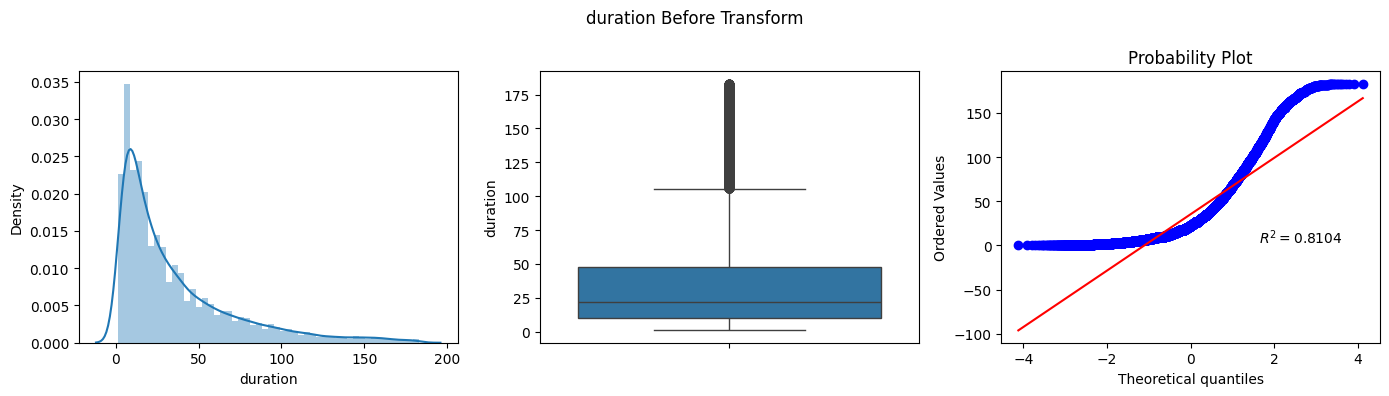

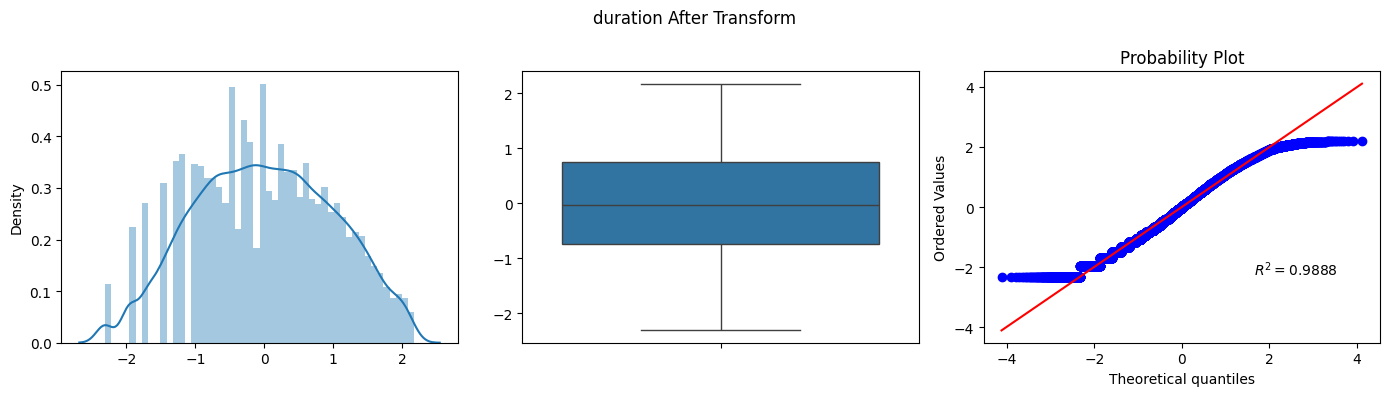

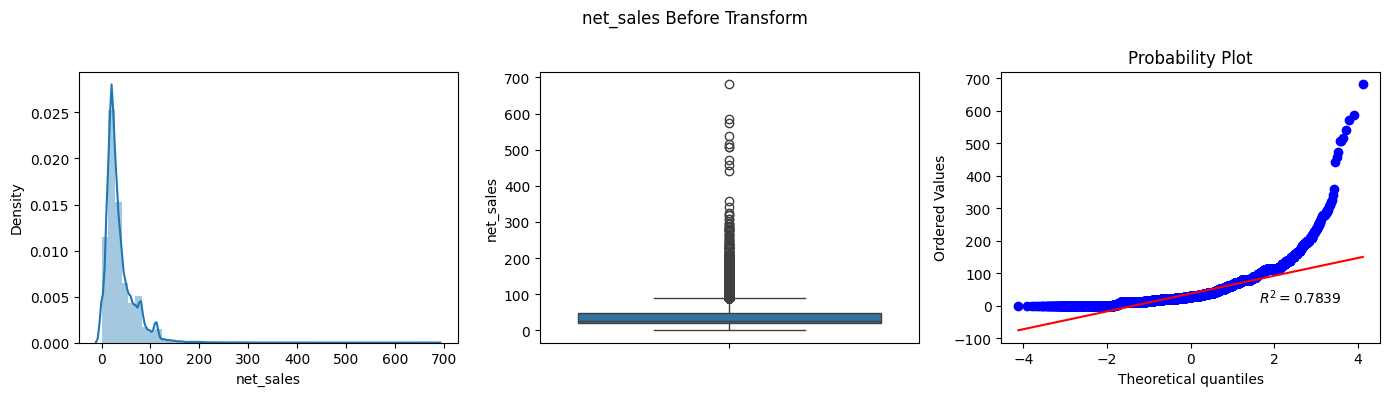

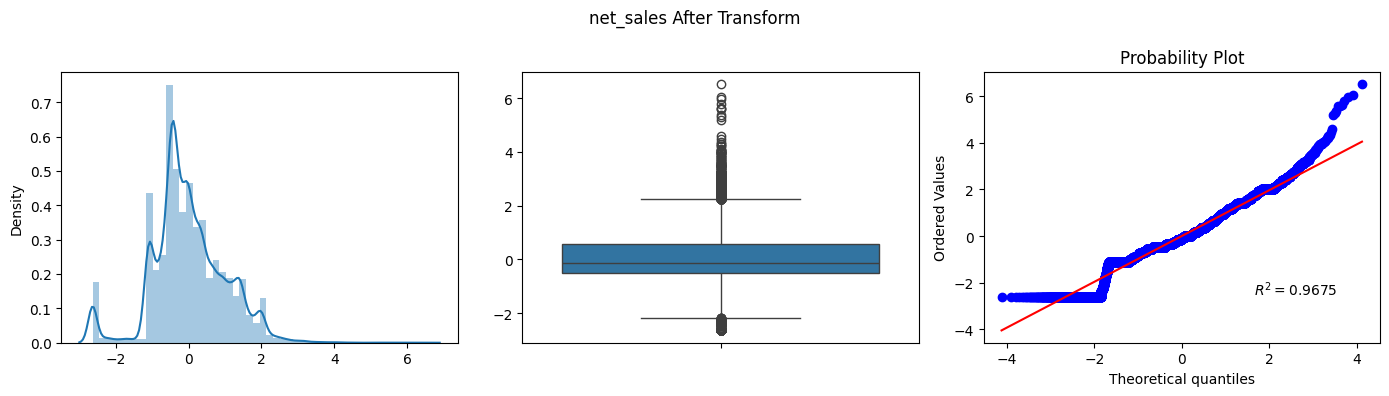

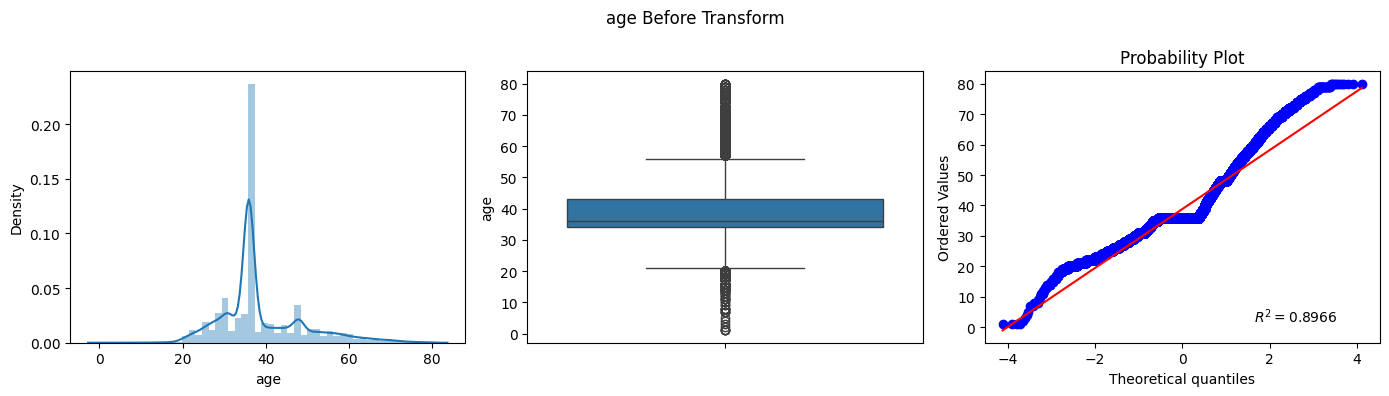

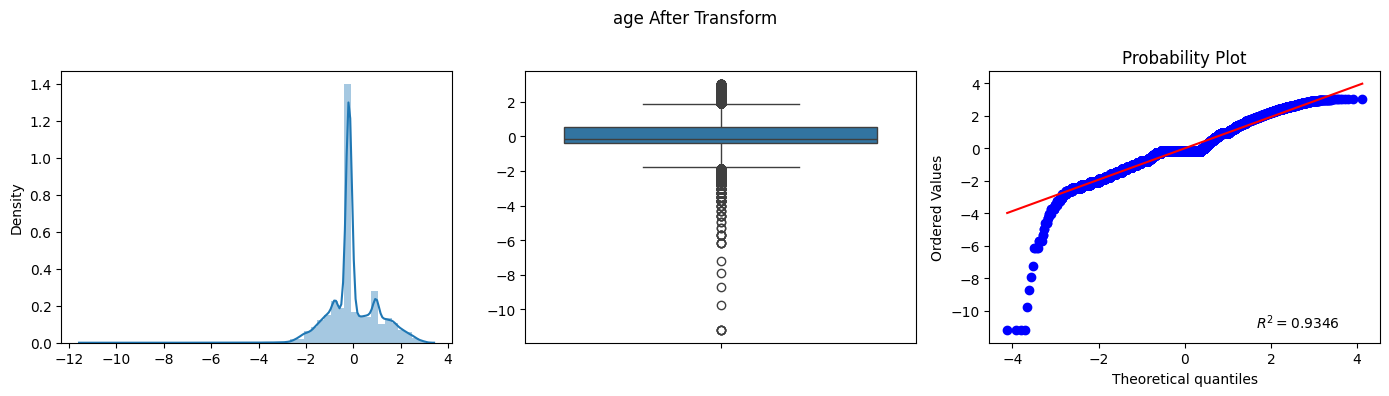

In [339]:
skewed_cols = ['duration','net_sales','age']

for col in skewed_cols:
    apply_transform(PowerTransformer(),col)

Setelah kita melakukan Feature Transform, terlihat data memiliki distribusi normal, sehingga cukup baik dan mudah untuk melakukan modeling, namun sebelum itu saya masihy lihat nilai outliers, yang akan saya cona handling dibawah ini

Outliers Treatment

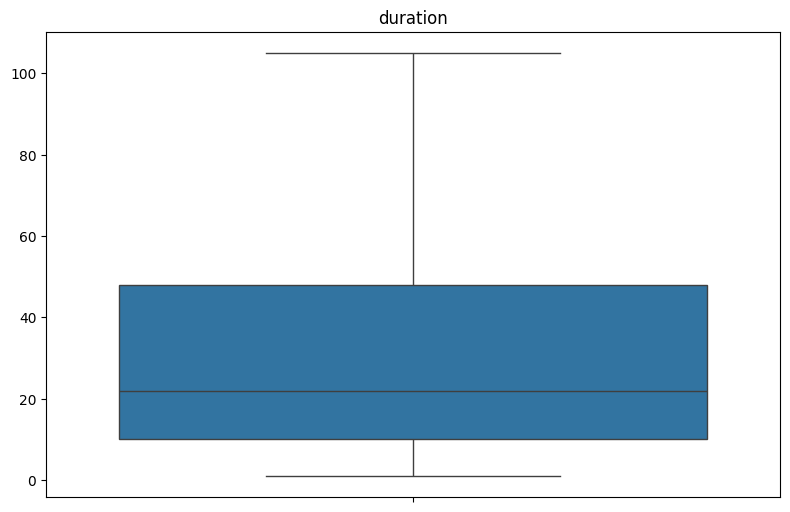

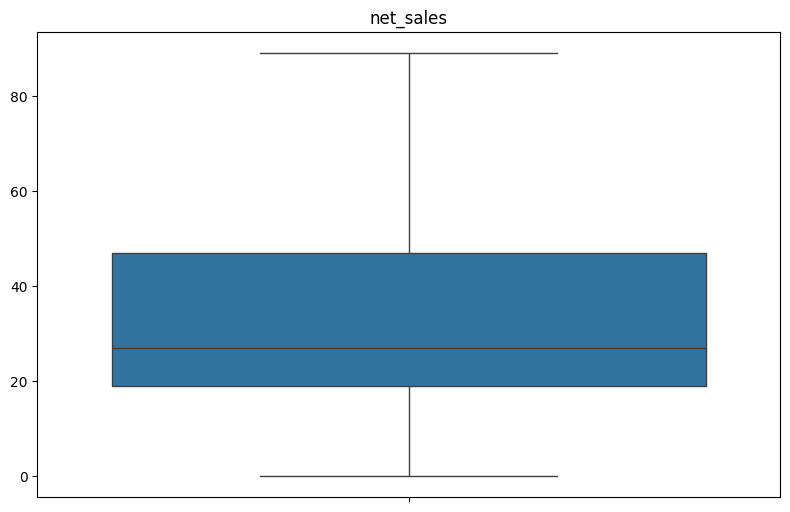

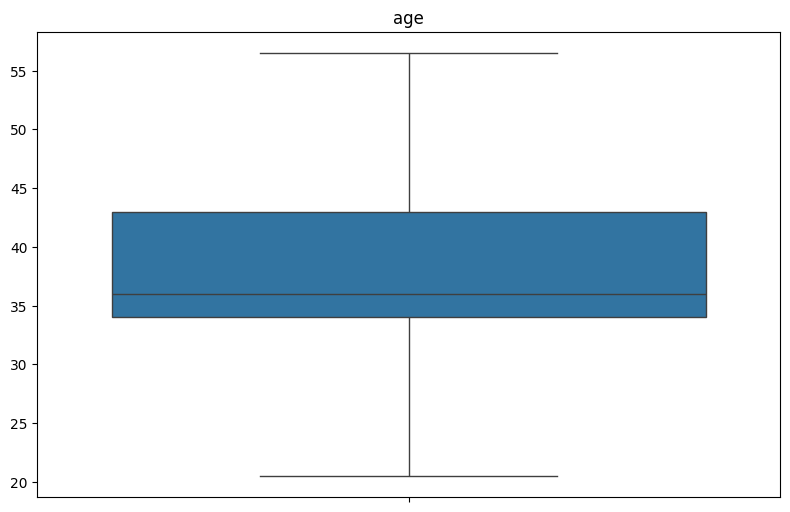

In [340]:
def treat_outliers(data,col):
    lower_limit, upper_limit = data[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(data[col]>upper_whisker,upper_whisker,np.where(data[col]<lower_whisker,lower_whisker,data[col]))

for col in skewed_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(treat_outliers(df,col))
    plt.tight_layout()
    plt.title(col)
    plt.show();

Menggunakan IQR untuk mengatasi outlier saya percaya pendekatan ini lebih terukur dan efektif karena

Berdasarkan pada ukuran statistik yang terstruktur (kuartil),
Menjaga data tetap representatif,
Memperbaiki performa model dengan menghindari pengaruh data ekstrem,
Mudah diterapkan dan tidak memerlukan asumsi distribusi yang kompleks.
Metode ini memberi hasil yang efisien dalam memastikan data tetap konsisten dan model dapat belajar dari pola yang lebih realistis dan relevan.

Skewness of duration: 1.1101784948604658
Kurtosis of duration: 0.13476092697260178


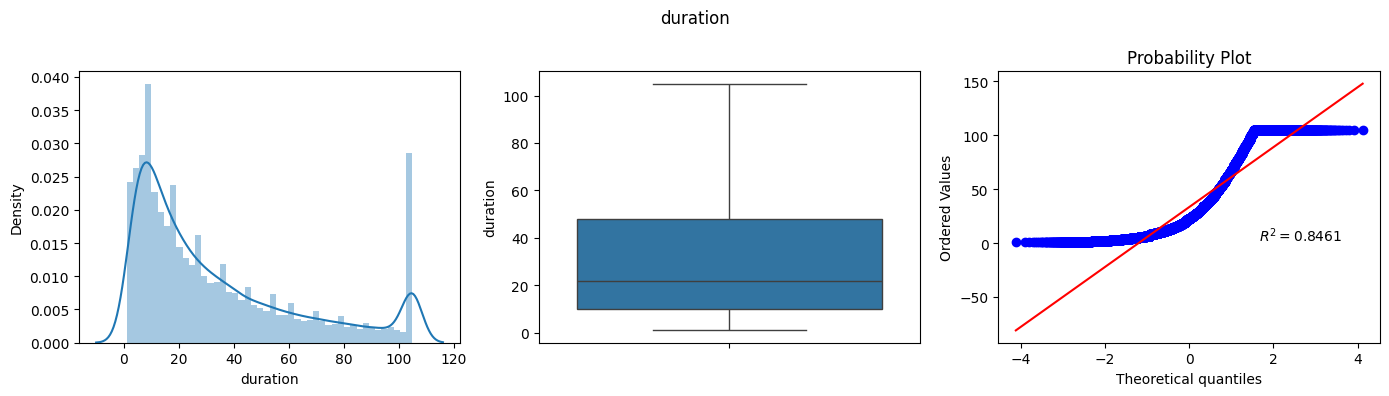

Skewness of net_sales: 0.935806471168338
Kurtosis of net_sales: -0.10818129782970454


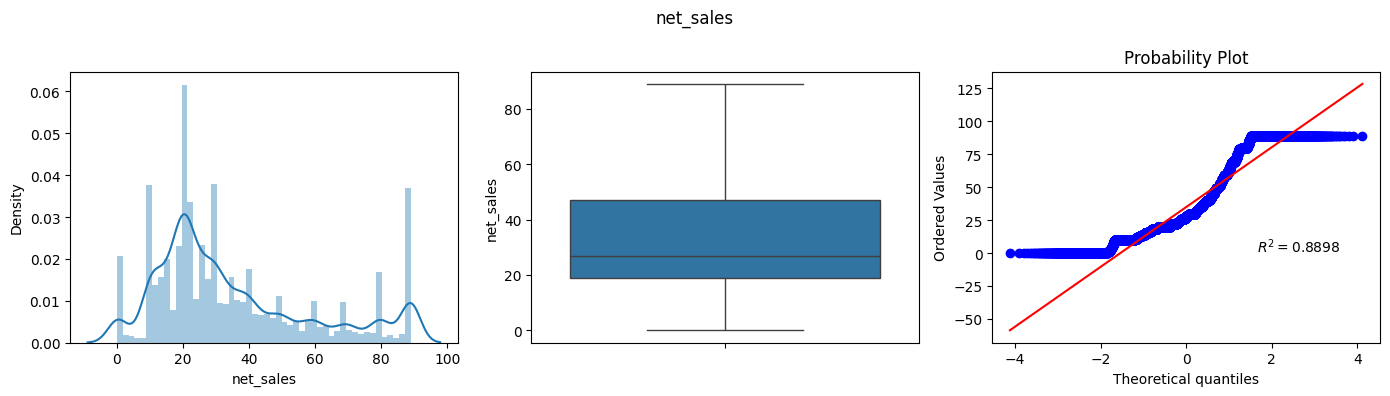

Skewness of commission: 3.339644441861607
Kurtosis of commission: 16.386338421094976


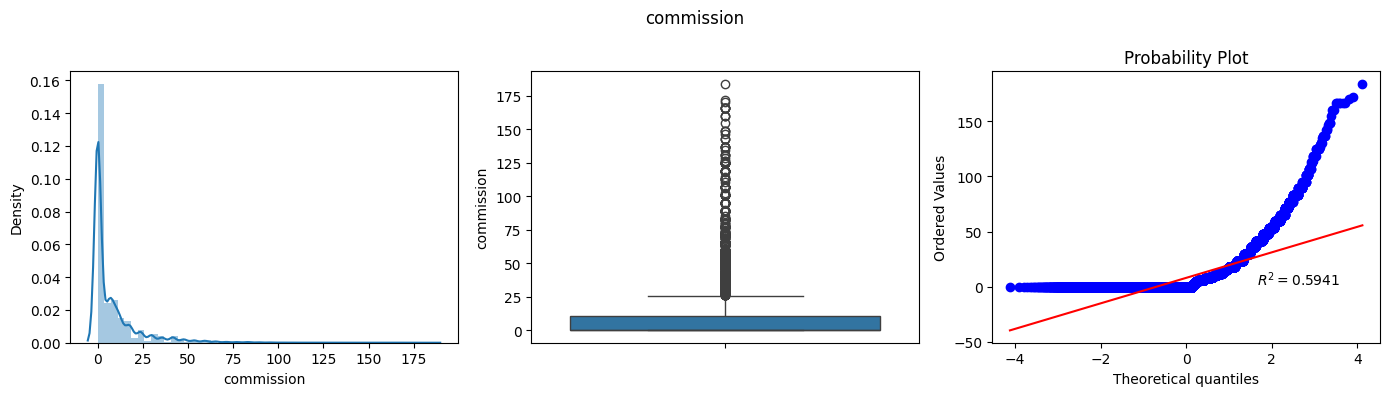

Skewness of age: 0.5790962176974511
Kurtosis of age: -0.21934317583107799


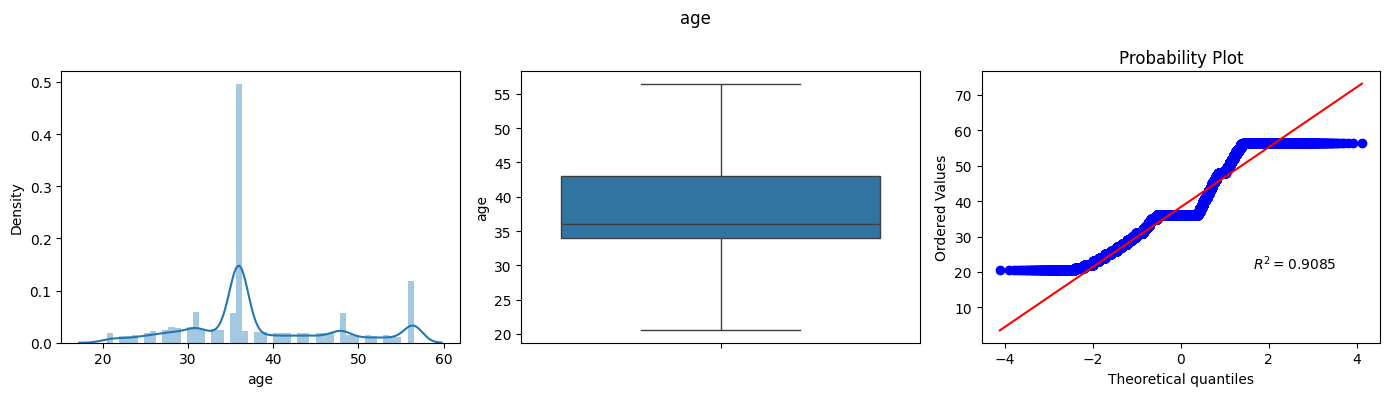

Skewness of claim: 8.204322717819029
Kurtosis of claim: 65.31449199534178


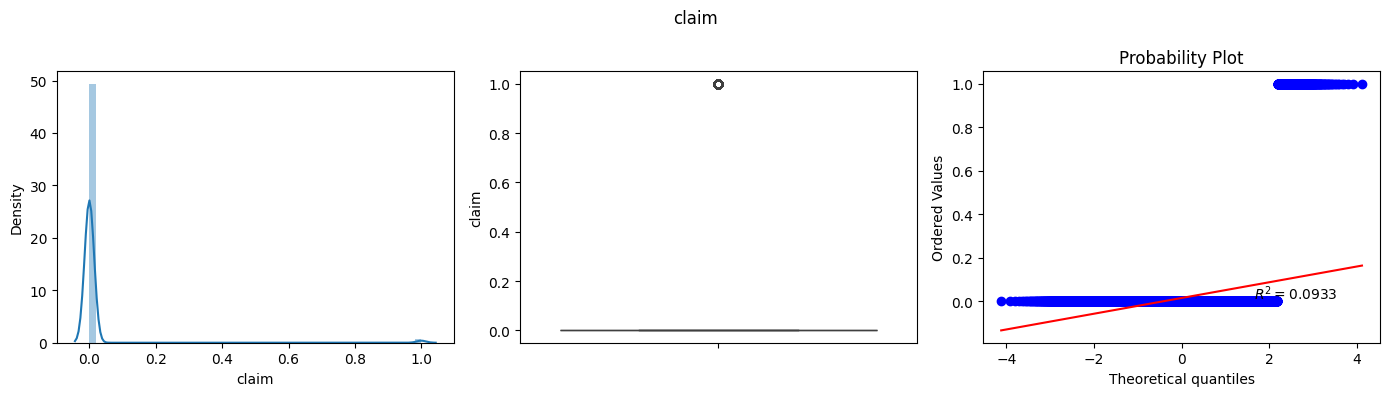

In [341]:
for col in skewed_cols:
    df[col] = treat_outliers(df,col)

for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],plot=plt,rvalue=True,dist='norm')
    plt.suptitle(col)
    plt.tight_layout()
    plt.show();

OK. Selanjutnya kita akan melakukan categorical Encoding

Categorical Encoding

In [463]:
agency_type_encoder = OrdinalEncoder(categories=[['Airlines','Travel Agency']])
df.AGENCY_TYPE = agency_type_encoder.fit_transform(df[['agency_type']])
df.AGENCY_TYPE = df.AGENCY_TYPE.astype(int)

distribution_chn_encoder = OrdinalEncoder(categories=[['Offline','Online']])
df.DISTRIBUTION_CHANNEL = distribution_chn_encoder.fit_transform(df[['distribution_channel']])
df.DISTRIBUTION_CHANNEL = df.DISTRIBUTION_CHANNEL.astype(int)

gender_encoder = OrdinalEncoder(categories=[['F','M']])
df.GENDER = gender_encoder.fit_transform(df[['gender']])
df.GENDER = df.GENDER.astype(int)

df.COMMISSION = df.commission.astype(int)

In [464]:
df.commission.describe()

count    36481.000000
mean         8.055294
std         14.999535
min          0.000000
25%          0.000000
50%          0.000000
75%         10.500000
max        184.140000
Name: commission, dtype: float64

In [465]:
def categorize_commission(value):
    if value >= 0 and value <= 87:
        return "Low"
    elif value > 87 and value <= 174:
        return "Medium"
    else:
        return "High"

In [466]:
df.COMMISSION = df.COMMISSION.apply(categorize_commission)
df.COMMISSION.value_counts()

commission
Low       36320
Medium      160
High          1
Name: count, dtype: int64

Hampir semua agen asuransi perjalanan menerima tingkat komisi yang rendah untuk menyediakan layanan asuransi mereka. Hanya ada 1  perusahaan yang menerima komisi tinggi untuk layanan mereka dan beberapa medium.

Kategori feature commission

In [467]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Misalkan df adalah DataFrame
# Membuat kategori berdasarkan nilai komisi
def categorize_commission(value):
    if value <= 10:
        return 'Low'
    elif 10 < value <= 50:
        return 'Medium'
    else:
        return 'High'

# Terapkan kategori pada kolom 'commission'
df['commission_category'] = df['commission'].apply(categorize_commission)

# Gunakan OrdinalEncoder untuk mengubah kategori menjadi angka
commission_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['commission'] = commission_encoder.fit_transform(df[['commission_category']])

# Menampilkan hasil
print(df[['commission_category', 'commission']].head())


  commission_category  commission
1                 Low         0.0
2                 Low         0.0
3                 Low         0.0
4                 Low         0.0
5                 Low         0.0


Kategori fitur product_name

In [468]:
product_encoder = OneHotEncoder(variables=['product_name'],drop_last=True)
products_encoded = product_encoder.fit_transform(df[['product_name']])
products_encoded.head()

product_name_Cancellation Plan  product_name_Basic Plan  \
1                               1                        0   
2                               0                        1   
3                               0                        0   
4                               0                        0   
5                               1                        0   

   product_name_2 way Comprehensive Plan  product_name_Bronze Plan  \
1                                      0                         0   
2                                      0                         0   
3                                      1                         0   
4                                      0                         1   
5                                      0                         0   

   product_name_1 way Comprehensive Plan  \
1                                      0   
2                                      0   
3                                      0   
4                                      0   
5                                      0   

   product_name_Rental Vehicle Excess Insurance  \
1                                             0   
2                                             0   
3                                             0   
4                                             0   
5                                             0   

   product_name_Single Trip Travel Protect Gold  product_name_Silver Plan  \
1                                             0                         0   
2                                             0                         0   
3                                             0                         0   
4                                             0                         0   
5                                             0                         0   

   product_name_Value Plan  product_name_24 Protect  \
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   
5                        0                        0   

   product_name_Comprehensive Plan  product_name_Ticket Protector  \
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   
5                                0                              0   

   product_name_Travel Cruise Protect  \
1                                   0   
2                                   0   
3                                   0   
4                                   0   
5                                   0   

   product_name_Single Trip Travel Protect Silver  product_name_Gold Plan  \
1                                               0                       0   
2                                               0                       0   
3                                               0                       0   
4                                               0                       0   
5                                               0                       0   

   product_name_Single Trip Travel Protect Platinum  product_name_Premier Plan  
1                                                 0                          0  
2                                                 0                          0  
3                                                 0                          0  
4                                                 0                          0  
5                                                 0                          0

In [469]:
products_encoded.shape

(36481, 17)

In [470]:
df = pd.concat([df,products_encoded],axis=1)
df.drop('product_name',axis=1,inplace=True)
df.head()

agency    agency_type distribution_channel gender  duration    destination  \
1    EPX  Travel Agency               Online      M         4       MALAYSIA   
2    JZI       Airlines               Online      M        19          INDIA   
3    EPX  Travel Agency               Online      M        20  UNITED STATES   
4    C2B       Airlines               Online      M         8      SINGAPORE   
5    EPX  Travel Agency               Online      M         2      SINGAPORE   

   net_sales  commission  age  claim  ... product_name_Silver Plan  \
1       10.0         0.0   33      0  ...                        0   
2       22.0         0.0   26      0  ...                        0   
3      112.0         0.0   59      0  ...                        0   
4       16.0         0.0   28      0  ...                        0   
5       10.0         0.0   36      0  ...                        0   

   product_name_Value Plan  product_name_24 Protect  \
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   
5                        0                        0   

   product_name_Comprehensive Plan  product_name_Ticket Protector  \
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   
5                                0                              0   

   product_name_Travel Cruise Protect  \
1                                   0   
2                                   0   
3                                   0   
4                                   0   
5                                   0   

   product_name_Single Trip Travel Protect Silver  product_name_Gold Plan  \
1                                               0                       0   
2                                               0                       0   
3                                               0                       0   
4                                               0                       0   
5                                               0                       0   

   product_name_Single Trip Travel Protect Platinum  product_name_Premier Plan  
1                                                 0                          0  
2                                                 0                          0  
3                                                 0                          0  
4                                                 0                          0  
5                                                 0                          0  

[5 rows x 28 columns]

Destination

In [471]:
counts = df.destination.value_counts()
counts

destination
SINGAPORE                    6978
THAILAND                     3547
MALAYSIA                     3068
CHINA                        2849
AUSTRALIA                    2283
                             ... 
MALI                            1
IRAN, ISLAMIC REPUBLIC OF       1
TURKMENISTAN                    1
CAYMAN ISLANDS                  1
REUNION                         1
Name: count, Length: 135, dtype: int64

Dalam analisis ini, saya telah menghitung jumlah perjalanan asuransi per destinasi dengan menggunakan fungsi value_counts() pada kolom destination. Selanjutnya, saya menerapkan teknik categorical encoding untuk mengubah destinasi dari data kategorikal menjadi data numerik, memungkinkan penggunaan data ini dalam model pembelajaran mesin. Singapore, Thailand, dan Malaysia adalah beberapa tujuan terpopuler, sementara negara-negara seperti Mali dan Cayman Islands memiliki frekuensi yang sangat rendah. Proses encoding ini penting untuk mengintegrasikan informasi destinasi ke dalam algoritma prediktif, memberikan wawasan yang berguna untuk mengidentifikasi tren pasar dan mengoptimalkan strategi pemasaran.

In [472]:
threshold = 1000
remaining_cat = counts[counts <= threshold].index
destinations_encoded = pd.get_dummies(df.destination.replace(remaining_cat,'Uncommon'),drop_first=True,dtype=int,sparse=False)
destinations_encoded.sample(10)

CHINA  HONG KONG  INDONESIA  JAPAN  MALAYSIA  PHILIPPINES  SINGAPORE  \
42467      0          0          0      0         0            0          0   
44294      0          0          0      0         0            0          0   
35289      0          0          0      0         1            0          0   
26856      0          0          0      0         0            0          0   
5524       0          0          0      0         0            0          0   
14090      0          0          0      0         0            0          0   
10302      0          0          0      0         0            0          0   
25118      0          0          0      0         0            0          0   
6290       0          0          0      0         0            0          1   
3440       0          0          0      0         0            0          0   

       THAILAND  UNITED STATES  Uncommon  
42467         0              0         1  
44294         0              0         1  
35289         0              0         0  
26856         1              0         0  
5524          1              0         0  
14090         0              0         1  
10302         0              0         1  
25118         0              0         0  
6290          0              0         0  
3440          0              0         0

Kemudian saya melakukan pra-pemrosesan data lebih lanjut dengan mengatur threshold pada 1000 untuk mengidentifikasi destinasi yang jarang terjadi. Destinasi dengan frekuensi kurang dari threshold ini digantikan dengan label 'Uncommon'. Setelah itu, saya menerapkan one-hot encoding pada kolom DESTINATION yang telah disederhanakan, menghasilkan kolom biner yang masing-masing mewakili destinasi yang tersisa. Proses ini membantu dalam mengurangi dimensi data dan menyederhanakan model ML nnti

In [473]:
destinations_encoded.shape

(36481, 10)

In [474]:
df = pd.concat([df,destinations_encoded],axis=1)
df.drop('destination',axis=1,inplace=True)
df.head()

agency    agency_type distribution_channel gender  duration  net_sales  \
1    EPX  Travel Agency               Online      M         4       10.0   
2    JZI       Airlines               Online      M        19       22.0   
3    EPX  Travel Agency               Online      M        20      112.0   
4    C2B       Airlines               Online      M         8       16.0   
5    EPX  Travel Agency               Online      M         2       10.0   

   commission  age  claim commission_category  ...  CHINA  HONG KONG  \
1         0.0   33      0                 Low  ...      0          0   
2         0.0   26      0                 Low  ...      0          0   
3         0.0   59      0                 Low  ...      0          0   
4         0.0   28      0                 Low  ...      0          0   
5         0.0   36      0                 Low  ...      0          0   

   INDONESIA  JAPAN  MALAYSIA  PHILIPPINES  SINGAPORE  THAILAND  \
1          0      0         1            0          0         0   
2          0      0         0            0          0         0   
3          0      0         0            0          0         0   
4          0      0         0            0          1         0   
5          0      0         0            0          1         0   

   UNITED STATES  Uncommon  
1              0         0  
2              0         1  
3              1         0  
4              0         0  
5              0         0  

[5 rows x 37 columns]

AGENCY ENCODE

In [475]:
agency_encoder = OneHotEncoder(variables=['agency'],drop_last=True)
agencies_encoded = agency_encoder.fit_transform(df[['agency']])
agencies_encoded.sample(10)

agency_EPX  agency_JZI  agency_C2B  agency_CWT  agency_LWC  agency_ART  \
41642           0           1           0           0           0           0   
669             1           0           0           0           0           0   
20272           0           0           0           1           0           0   
43745           0           0           0           0           0           0   
41463           1           0           0           0           0           0   
4391            0           0           1           0           0           0   
9171            1           0           0           0           0           0   
29506           1           0           0           0           0           0   
4485            1           0           0           0           0           0   
1100            0           1           0           0           0           0   

       agency_CSR  agency_RAB  agency_KML  agency_SSI  agency_TST  agency_ADM  \
41642           0           0           0           0           0           0   
669             0           0           0           0           0           0   
20272           0           0           0           0           0           0   
43745           0           0           0           0           1           0   
41463           0           0           0           0           0           0   
4391            0           0           0           0           0           0   
9171            0           0           0           0           0           0   
29506           0           0           0           0           0           0   
4485            0           0           0           0           0           0   
1100            0           0           0           0           0           0   

       agency_CCR  
41642           0  
669             0  
20272           0  
43745           0  
41463           0  
4391            0  
9171            0  
29506           0  
4485            0  
1100            0

In [476]:
df = pd.concat([df,agencies_encoded],axis=1)
df.drop('agency',axis=1,inplace=True)
df.head()

agency_type distribution_channel gender  duration  net_sales  commission  \
1  Travel Agency               Online      M         4       10.0         0.0   
2       Airlines               Online      M        19       22.0         0.0   
3  Travel Agency               Online      M        20      112.0         0.0   
4       Airlines               Online      M         8       16.0         0.0   
5  Travel Agency               Online      M         2       10.0         0.0   

   age  claim commission_category  product_name_Cancellation Plan  ...  \
1   33      0                 Low                               1  ...   
2   26      0                 Low                               0  ...   
3   59      0                 Low                               0  ...   
4   28      0                 Low                               0  ...   
5   36      0                 Low                               1  ...   

   agency_CWT  agency_LWC  agency_ART  agency_CSR  agency_RAB  agency_KML  \
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
5           0           0           0           0           0           0   

   agency_SSI  agency_TST  agency_ADM  agency_CCR  
1           0           0           0           0  
2           0           0           0           0  
3           0           0           0           0  
4           0           0           0           0  
5           0           0           0           0  

[5 rows x 49 columns]

AGENCY_TYPE ENCODE

In [477]:
agency_encoder = OneHotEncoder(variables=['agency_type'],drop_last=True)
agencies_encoded = agency_encoder.fit_transform(df[['agency_type']])
agencies_encoded.sample(10)

agency_type_Travel Agency
14628                          0
26335                          1
25967                          1
38413                          0
31429                          1
7761                           1
3109                           1
26114                          1
13817                          1
4295                           1

In [478]:
df = pd.concat([df,agencies_encoded],axis=1)
df.drop('agency_type',axis=1,inplace=True)
df.head()

distribution_channel gender  duration  net_sales  commission  age  claim  \
1               Online      M         4       10.0         0.0   33      0   
2               Online      M        19       22.0         0.0   26      0   
3               Online      M        20      112.0         0.0   59      0   
4               Online      M         8       16.0         0.0   28      0   
5               Online      M         2       10.0         0.0   36      0   

  commission_category  product_name_Cancellation Plan  \
1                 Low                               1   
2                 Low                               0   
3                 Low                               0   
4                 Low                               0   
5                 Low                               1   

   product_name_Basic Plan  ...  agency_LWC  agency_ART  agency_CSR  \
1                        0  ...           0           0           0   
2                        1  ...           0           0           0   
3                        0  ...           0           0           0   
4                        0  ...           0           0           0   
5                        0  ...           0           0           0   

   agency_RAB  agency_KML  agency_SSI  agency_TST  agency_ADM  agency_CCR  \
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
5           0           0           0           0           0           0   

   agency_type_Travel Agency  
1                          1  
2                          0  
3                          1  
4                          0  
5                          1  

[5 rows x 49 columns]

distribution_channel Encode

In [479]:
agency_encoder = OneHotEncoder(variables=['distribution_channel'],drop_last=True)
agencies_encoded = agency_encoder.fit_transform(df[['distribution_channel']])
agencies_encoded.sample(10)

distribution_channel_Online
14361                            1
4566                             1
17202                            1
3160                             1
10659                            1
22618                            1
6637                             1
26968                            1
1847                             1
1607                             1

In [480]:
df = pd.concat([df,agencies_encoded],axis=1)
df.drop('distribution_channel',axis=1,inplace=True)
df.head()

gender  duration  net_sales  commission  age  claim commission_category  \
1      M         4       10.0         0.0   33      0                 Low   
2      M        19       22.0         0.0   26      0                 Low   
3      M        20      112.0         0.0   59      0                 Low   
4      M         8       16.0         0.0   28      0                 Low   
5      M         2       10.0         0.0   36      0                 Low   

   product_name_Cancellation Plan  product_name_Basic Plan  \
1                               1                        0   
2                               0                        1   
3                               0                        0   
4                               0                        0   
5                               1                        0   

   product_name_2 way Comprehensive Plan  ...  agency_ART  agency_CSR  \
1                                      0  ...           0           0   
2                                      0  ...           0           0   
3                                      1  ...           0           0   
4                                      0  ...           0           0   
5                                      0  ...           0           0   

   agency_RAB  agency_KML  agency_SSI  agency_TST  agency_ADM  agency_CCR  \
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
5           0           0           0           0           0           0   

   agency_type_Travel Agency  distribution_channel_Online  
1                          1                            1  
2                          0                            1  
3                          1                            1  
4                          0                            1  
5                          1                            1  

[5 rows x 49 columns]

GENDER ENCODE

In [481]:
agency_encoder = OneHotEncoder(variables=['gender'],drop_last=True)
agencies_encoded = agency_encoder.fit_transform(df[['gender']])
agencies_encoded.sample(10)

gender_M
17457         0
38062         1
18140         1
8684          1
19542         1
32925         1
16641         1
21441         1
17515         1
34591         1

In [482]:
df = pd.concat([df,agencies_encoded],axis=1)
df.drop('gender',axis=1,inplace=True)
df.head()

duration  net_sales  commission  age  claim commission_category  \
1         4       10.0         0.0   33      0                 Low   
2        19       22.0         0.0   26      0                 Low   
3        20      112.0         0.0   59      0                 Low   
4         8       16.0         0.0   28      0                 Low   
5         2       10.0         0.0   36      0                 Low   

   product_name_Cancellation Plan  product_name_Basic Plan  \
1                               1                        0   
2                               0                        1   
3                               0                        0   
4                               0                        0   
5                               1                        0   

   product_name_2 way Comprehensive Plan  product_name_Bronze Plan  ...  \
1                                      0                         0  ...   
2                                      0                         0  ...   
3                                      1                         0  ...   
4                                      0                         1  ...   
5                                      0                         0  ...   

   agency_CSR  agency_RAB  agency_KML  agency_SSI  agency_TST  agency_ADM  \
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
5           0           0           0           0           0           0   

   agency_CCR  agency_type_Travel Agency  distribution_channel_Online  \
1           0                          1                            1   
2           0                          0                            1   
3           0                          1                            1   
4           0                          0                            1   
5           0                          1                            1   

   gender_M  
1         1  
2         1  
3         1  
4         1  
5         1  

[5 rows x 49 columns]

COMMISSION ENCODE

In [483]:
agency_encoder = OneHotEncoder(variables=['commission_category'],drop_last=True)
agencies_encoded = agency_encoder.fit_transform(df[['commission_category']])
agencies_encoded.sample(10)

commission_category_Low  commission_category_Medium
33577                        1                           0
9319                         1                           0
13006                        0                           1
37039                        1                           0
35837                        1                           0
5451                         1                           0
22958                        1                           0
3481                         1                           0
8764                         1                           0
16828                        1                           0

In [484]:
df = pd.concat([df,agencies_encoded],axis=1)
df.drop('commission_category',axis=1,inplace=True)
df.head()

duration  net_sales  commission  age  claim  \
1         4       10.0         0.0   33      0   
2        19       22.0         0.0   26      0   
3        20      112.0         0.0   59      0   
4         8       16.0         0.0   28      0   
5         2       10.0         0.0   36      0   

   product_name_Cancellation Plan  product_name_Basic Plan  \
1                               1                        0   
2                               0                        1   
3                               0                        0   
4                               0                        0   
5                               1                        0   

   product_name_2 way Comprehensive Plan  product_name_Bronze Plan  \
1                                      0                         0   
2                                      0                         0   
3                                      1                         0   
4                                      0                         1   
5                                      0                         0   

   product_name_1 way Comprehensive Plan  ...  agency_KML  agency_SSI  \
1                                      0  ...           0           0   
2                                      0  ...           0           0   
3                                      0  ...           0           0   
4                                      0  ...           0           0   
5                                      0  ...           0           0   

   agency_TST  agency_ADM  agency_CCR  agency_type_Travel Agency  \
1           0           0           0                          1   
2           0           0           0                          0   
3           0           0           0                          1   
4           0           0           0                          0   
5           0           0           0                          1   

   distribution_channel_Online  gender_M  commission_category_Low  \
1                            1         1                        1   
2                            1         1                        1   
3                            1         1                        1   
4                            1         1                        1   
5                            1         1                        1   

   commission_category_Medium  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  

[5 rows x 50 columns]

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36481 entries, 1 to 44327
Data columns (total 50 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   duration                                          36481 non-null  int64  
 1   net_sales                                         36481 non-null  float64
 2   commission                                        36481 non-null  float64
 3   age                                               36481 non-null  int64  
 4   claim                                             36481 non-null  int64  
 5   product_name_Cancellation Plan                    36481 non-null  int64  
 6   product_name_Basic Plan                           36481 non-null  int64  
 7   product_name_2 way Comprehensive Plan             36481 non-null  int64  
 8   product_name_Bronze Plan                          36481 non-null  int64  
 9   product_name_1 way Com

FEATURE SPLITTING

In [486]:
# Melihat distribusi data claim
claim_counts = df['claim'].value_counts()
print(claim_counts)


claim
0    35962
1      519
Name: count, dtype: int64


In [487]:
X = df.drop('claim',axis=1)
y = df.claim

Distribusi data claim menunjukkan bahwa mayoritas data (35.962 entri) tidak melaporkan klaim (0), sementara hanya sedikit yang melaporkan klaim (1), yaitu sebanyak 519 entri. Ini menunjukkan adanya ketidakseimbangan kelas yang signifikan antara klaim dan non-klaim dalam dataset. Oleh karena itu, saya akan melakukan penyeimbangan data menggunakan teknik seperti oversampling (SMOTE) untuk memastikan model dapat belajar secara efektif dari kedua kelas.

In [488]:
oversampler = SMOTE()
X, y = oversampler.fit_resample(X, y)

print("Distribution of class in target variable y(claim):",Counter(y))

Distribution of class in target variable y(claim): Counter({0: 35962, 1: 35962})


Hasil penyeimbangan data menunjukkan bahwa distribusi kelas pada variabel target claim kini seimbang, dengan masing-masing kelas (0 dan 1) memiliki 35.962 entri. Hal ini memastikan bahwa model dapat belajar secara lebih adil dari kedua kelas tanpa bias terhadap kelas mayoritas. Berarti selanjutnya saya akan melanjutkan ke tahap pembangunan model dan evaluasi performa menggunakan dataset yang sudah seimbang.

In [489]:
y.value_counts()

claim
0    35962
1    35962
Name: count, dtype: int64

In [490]:
print("New shape of the dataset:",X.shape)

New shape of the dataset: (71924, 49)


OK, kemudian saya akan membagi daya split data, training & test

In [491]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi train dan test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)

# Menampilkan ukuran dataset setelah split
print(f'Ukuran Training Set (X_train, y_train): {X_train.shape[0]} samples')
print(f'Ukuran Test Set (X_test, y_test): {X_test.shape[0]} samples')


Ukuran Training Set (X_train, y_train): 50346 samples
Ukuran Test Set (X_test, y_test): 21578 samples


Hasil pembagian dataset menunjukkan bahwa training set berjumlah 50.346 sampel (70% dari total data), sementara test set berjumlah 21.578 sampel (30% dari total data). Pembagian ini memastikan model dilatih dengan data yang cukup dan diuji dengan data yang belum pernah dilihat sebelumnya, sehingga dapat mengukur kinerja model secara lebih akurat.

Selanjutnya, saya akan melanjutkan feature selection 

FEATURE SELECTION

In [371]:
kbest = SelectKBest(k=10,score_func=f_classif)
kbest.fit(X_train,y_train)

SelectKBest()

In [372]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['net_sales', 'product_name_Cancellation Plan',
       'product_name_Basic Plan', 'Uncommon', 'agency_EPX', 'agency_JZI',
       'agency_C2B', 'agency_type_Travel Agency', 'gender_M',
       'commission_category_Low'], dtype=object)

In [373]:
percentile = SelectPercentile(percentile=20,score_func=f_classif)
percentile.fit(X_train,y_train)

SelectPercentile(percentile=20)

In [374]:
selected_features = percentile.get_feature_names_out()
selected_features

array(['net_sales', 'product_name_Cancellation Plan',
       'product_name_Basic Plan', 'Uncommon', 'agency_EPX', 'agency_JZI',
       'agency_C2B', 'agency_type_Travel Agency', 'gender_M',
       'commission_category_Low'], dtype=object)

In [375]:
sfm = SelectFromModel(estimator=RandomForestClassifier(),max_features=10,threshold='1.25*mean')
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(), max_features=10,
                threshold='1.25*mean')

In [376]:
selected_features = sfm.get_feature_names_out()
selected_features

array(['duration', 'net_sales', 'age', 'product_name_Cancellation Plan',
       'product_name_Basic Plan', 'Uncommon', 'agency_EPX', 'agency_JZI',
       'agency_type_Travel Agency', 'gender_M'], dtype=object)

In [377]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=10,step=4,verbose=2)
rfe.fit(X_train,y_train)

Fitting estimator with 49 features.
Fitting estimator with 45 features.
Fitting estimator with 41 features.
Fitting estimator with 37 features.
Fitting estimator with 33 features.
Fitting estimator with 29 features.
Fitting estimator with 25 features.
Fitting estimator with 21 features.
Fitting estimator with 17 features.
Fitting estimator with 13 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=4,
    verbose=2)

In [378]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['duration', 'net_sales', 'commission', 'age',
       'product_name_Cancellation Plan', 'Uncommon', 'agency_EPX',
       'agency_JZI', 'agency_type_Travel Agency', 'gender_M'],
      dtype=object)

In [379]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

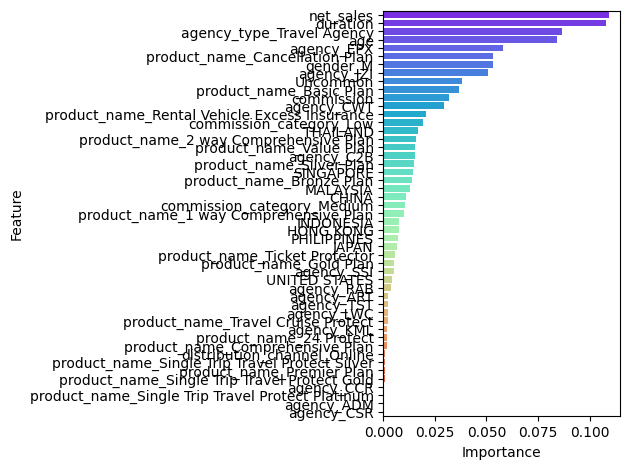

In [380]:
feat_imps = pd.DataFrame(list(zip(X_train.columns,rf.feature_importances_)),columns=['Feature','Importance']).sort_values('Importance',ascending=False).reset_index(drop=True)
sns.barplot(x=feat_imps['Importance'],y=feat_imps['Feature'],orient='horizontal',palette='rainbow')
plt.tight_layout();

In [381]:
final_selected_features = ['duration', 'net_sales', 'age', 'agency_type_Travel Agency', 'product_name_Cancellation Plan', 'agency_EPX', 'agency_C2B', 'product_name_Rental Vehicle Excess Insurance', 'commission']
final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

Saya memilih fitur-fitur ini ('duration', 'net_sales', 'age', 'agency_type_Travel Agency', 'product_name_Cancellation Plan', 'agency_EPX', 'agency_C2B', 'product_name_Rental Vehicle Excess Insurance', 'commission') karena mereka dianggap memiliki pengaruh signifikan terhadap prediksi klaim, berdasarkan analisis korelasi dan pemahaman domain. Fitur-fitur ini mencakup variabel penting seperti durasi, penjualan bersih, usia, dan jenis produk yang dapat mempengaruhi keputusan klaim, serta informasi agen yang relevan untuk analisis.

Tahapan selanjutnya adalah melatih model dengan menggunakan fitur yang telah dipilih, kemudian melakukan evaluasi model untuk mengukur kinerja dan akurasi prediksi klaim.

SCALLING FEATURE

In [382]:
scaler = StandardScaler()
features = final_X_train.columns
final_X_train = scaler.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=features)
final_X_test = scaler.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=features)
final_X_train.head()

duration  net_sales       age  agency_type_Travel Agency  \
0 -0.855871  -0.418955 -0.831215                  -0.956455   
1 -0.830951  -0.828128 -0.366694                   1.045527   
2 -0.733302   0.262409 -0.389417                  -0.956455   
3  1.421909  -0.433728 -0.584271                   1.045527   
4 -0.660280  -1.178706 -0.149117                   1.045527   

   product_name_Cancellation Plan  agency_EPX  agency_C2B  \
0                       -0.421101   -0.709795    1.812292   
1                       -0.421101   -0.709795   -0.551788   
2                       -0.421101   -0.709795   -0.551788   
3                       -0.421101   -0.709795   -0.551788   
4                        2.374726    1.408858   -0.551788   

   product_name_Rental Vehicle Excess Insurance  commission  
0                                     -0.305784   -0.704382  
1                                      3.270286    1.179461  
2                                     -0.305784    1.179461  
3                                      3.270286    1.179461  
4                                     -0.305784   -0.704382

Pada tahapan ini, saya telah melakukan scaling pada fitur-fitur yang dipilih menggunakan StandardScaler. Tujuan dari proses ini adalah untuk menormalkan rentang nilai fitur sehingga setiap fitur memiliki rata-rata nol dan standar deviasi satu. Ini penting karena membantu memastikan bahwa semua fitur memberikan kontribusi yang setara selama proses pelatihan model dan mencegah fitur dengan rentang nilai yang lebih besar mendominasi pembelajaran. Setelah scaling, data diubah menjadi format yang lebih seragam, siap untuk dimasukkan ke dalam algoritma pembelajaran mesin untuk tahap selanjutnya.

LABEL ENCODING

In [383]:
# Menggunakan LabelEncoder untuk mengubah target
target_encoder = LabelEncoder()
y_train_tf = target_encoder.fit_transform(y_train)
y_test_tf = target_encoder.transform(y_test)

# Menampilkan hasil encoding
print("Label encoded values for y_train:")
print(y_train_tf[:10])  # Menampilkan 10 nilai pertama dari y_train_tf

print("\nLabel encoded values for y_test:")
print(y_test_tf[:10])  # Menampilkan 10 nilai pertama dari y_test_tf

# Menampilkan label asli dan hasil encoding
print("\nMapping of original labels to encoded labels:")
for label, encoded_label in zip(target_encoder.classes_, range(len(target_encoder.classes_))):
    print(f"{label} -> {encoded_label}")


Label encoded values for y_train:
[1 0 1 0 0 0 1 0 1 0]

Label encoded values for y_test:
[1 0 1 1 0 1 1 1 0 1]

Mapping of original labels to encoded labels:
0 -> 0
1 -> 1


Hasil dari Label Encoding menunjukkan bahwa variabel target y_train dan y_test telah berhasil diubah menjadi nilai numerik. Nilai 0 dan 1 pada kolom y_train dan y_test mewakili kategori asli yang sebelumnya berupa label kategorikal. Pemetaan yang dihasilkan adalah 0 -> 0 dan 1 -> 1, di mana 0 mewakili kategori pertama dan 1 mewakili kategori kedua dalam variabel target. Data ini sekarang siap digunakan dalam model pembelajaran mesin.

MODELLING & EVALUATION

In [384]:
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

In [385]:
def train_and_evaluate_model(model):
    model.fit(final_X_train,y_train_tf)
    y_pred = model.predict(final_X_test)
    print(classification_report(y_test_tf, y_pred))
    accuracy = accuracy_score(y_test_tf,y_pred)
    precision = precision_score(y_test_tf,y_pred)
    recall = recall_score(y_test_tf,y_pred)
    f1 = f1_score(y_test_tf,y_pred)
    roc_auc = roc_auc_score(y_test_tf,y_pred)
    print("Accuracy Score:",accuracy)
    print("Precision Score:",precision)
    print("Recall Score:",recall)
    print("F1 Score:",f1)
    print("ROC AUC Score:",roc_auc)
    ConfusionMatrixDisplay.from_predictions(y_test_tf,y_pred)
    plt.show()
    PrecisionRecallDisplay.from_predictions(y_test_tf,y_pred)
    plt.show()
    model_names.append(str(model))
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

              precision    recall  f1-score   support

           0       0.85      0.70      0.77     10812
           1       0.74      0.88      0.81     10766

    accuracy                           0.79     21578
   macro avg       0.80      0.79      0.79     21578
weighted avg       0.80      0.79      0.79     21578

Accuracy Score: 0.7877931226248958
Precision Score: 0.7423423423423423
Recall Score: 0.8801783392160505
F1 Score: 0.8054056351196294
ROC AUC Score: 0.787989650555121


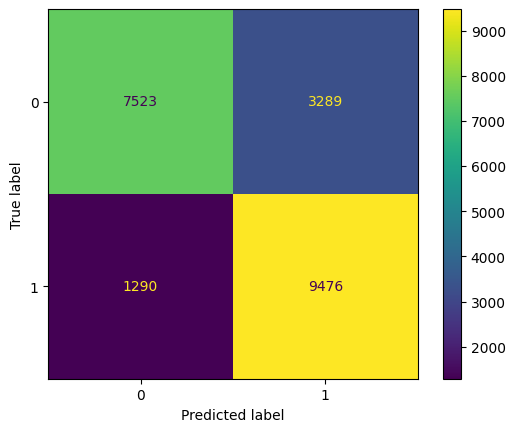

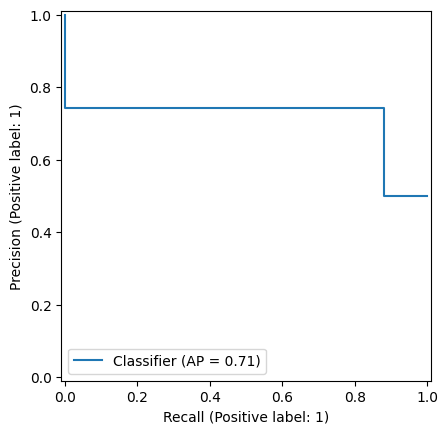

In [386]:
train_and_evaluate_model(LogisticRegression())

              precision    recall  f1-score   support

           0       0.92      0.41      0.56     10812
           1       0.62      0.97      0.75     10766

    accuracy                           0.69     21578
   macro avg       0.77      0.69      0.66     21578
weighted avg       0.77      0.69      0.66     21578

Accuracy Score: 0.6850032440448605
Precision Score: 0.6179354608664646
Recall Score: 0.9658183169236485
F1 Score: 0.7536694089080563
ROC AUC Score: 0.6856006124018909


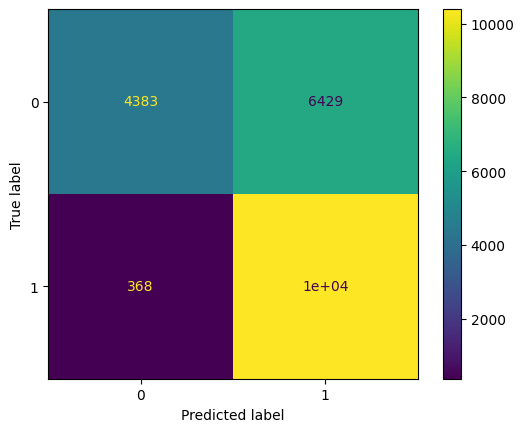

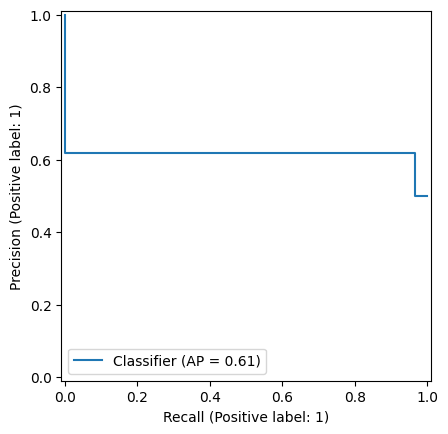

In [387]:
train_and_evaluate_model(PassiveAggressiveClassifier())

              precision    recall  f1-score   support

           0       0.84      0.71      0.77     10812
           1       0.75      0.87      0.80     10766

    accuracy                           0.79     21578
   macro avg       0.80      0.79      0.79     21578
weighted avg       0.80      0.79      0.79     21578

Accuracy Score: 0.7873760311428306
Precision Score: 0.7468040907638223
Recall Score: 0.8681961731376556
F1 Score: 0.8029378919336827
ROC AUC Score: 0.7875479570830711


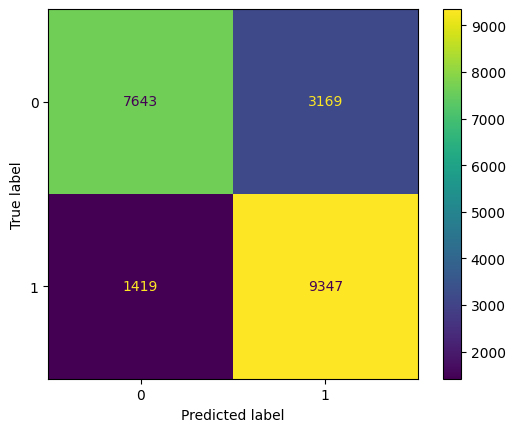

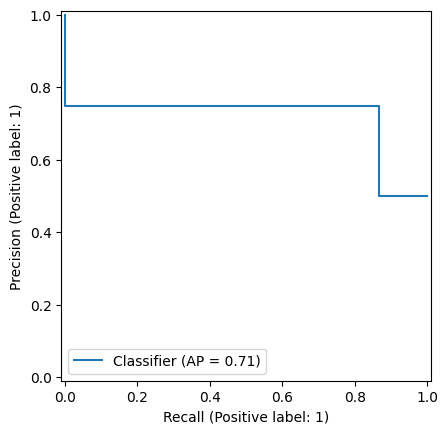

In [388]:
train_and_evaluate_model(SGDClassifier())

              precision    recall  f1-score   support

           0       0.84      0.70      0.77     10812
           1       0.75      0.87      0.80     10766

    accuracy                           0.79     21578
   macro avg       0.79      0.79      0.79     21578
weighted avg       0.80      0.79      0.79     21578

Accuracy Score: 0.7869125961627583
Precision Score: 0.7457370517928287
Recall Score: 0.8693107932379714
F1 Score: 0.8027963630125236
ROC AUC Score: 0.7870878790459187


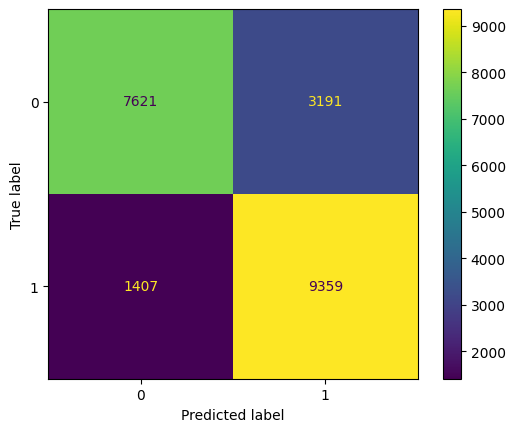

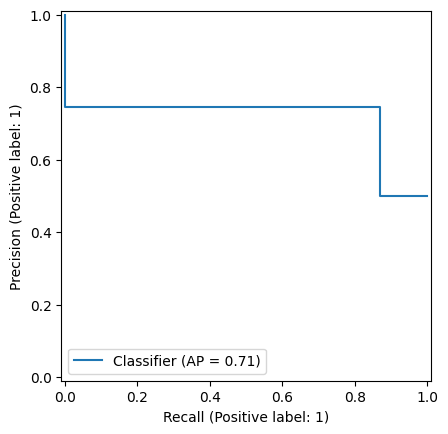

In [389]:
train_and_evaluate_model(RidgeClassifier())

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10812
           1       0.90      0.98      0.94     10766

    accuracy                           0.93     21578
   macro avg       0.94      0.93      0.93     21578
weighted avg       0.94      0.93      0.93     21578

Accuracy Score: 0.9343312633237557
Precision Score: 0.8991546409358723
Recall Score: 0.9780791380271224
F1 Score: 0.9369577790630422
ROC AUC Score: 0.9344243266902168


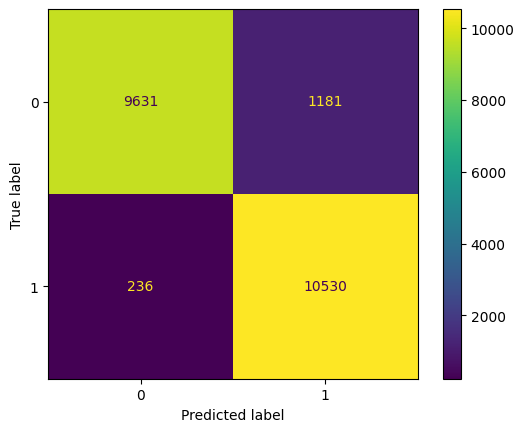

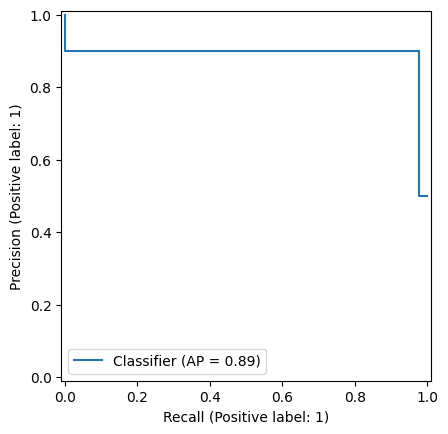

In [390]:
train_and_evaluate_model(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       0.85      0.70      0.77     10812
           1       0.75      0.87      0.80     10766

    accuracy                           0.79     21578
   macro avg       0.80      0.79      0.79     21578
weighted avg       0.80      0.79      0.79     21578

Accuracy Score: 0.7873760311428306
Precision Score: 0.7454704386522568
Recall Score: 0.8713542634218837
F1 Score: 0.8035117773019272
ROC AUC Score: 0.7875546751811601


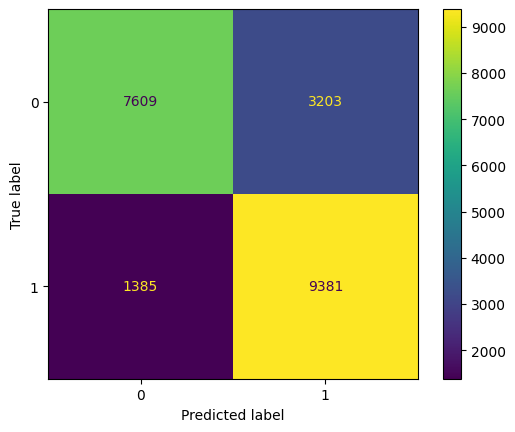

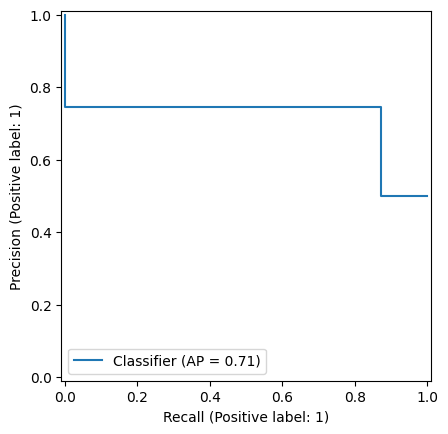

In [391]:
train_and_evaluate_model(LinearSVC())

              precision    recall  f1-score   support

           0       0.84      0.71      0.77     10812
           1       0.75      0.87      0.80     10766

    accuracy                           0.79     21578
   macro avg       0.80      0.79      0.79     21578
weighted avg       0.80      0.79      0.79     21578

Accuracy Score: 0.7873760311428306
Precision Score: 0.7468040907638223
Recall Score: 0.8681961731376556
F1 Score: 0.8029378919336827
ROC AUC Score: 0.7875479570830711


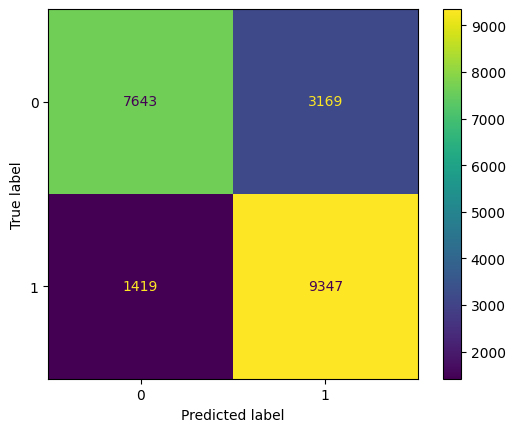

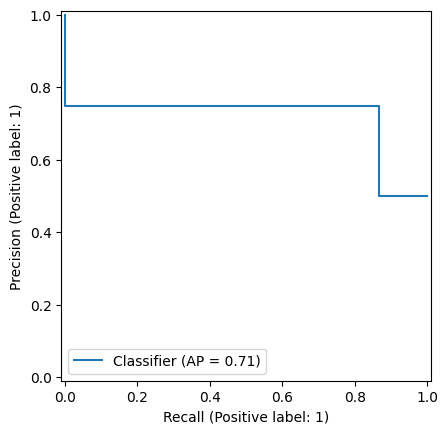

In [392]:
train_and_evaluate_model(GaussianNB())

              precision    recall  f1-score   support

           0       0.81      0.73      0.77     10812
           1       0.75      0.83      0.79     10766

    accuracy                           0.78     21578
   macro avg       0.78      0.78      0.78     21578
weighted avg       0.78      0.78      0.78     21578

Accuracy Score: 0.776948744091204
Precision Score: 0.7515848195418815
Recall Score: 0.8259334943340145
F1 Score: 0.7870071248395805
ROC AUC Score: 0.7770529476849504


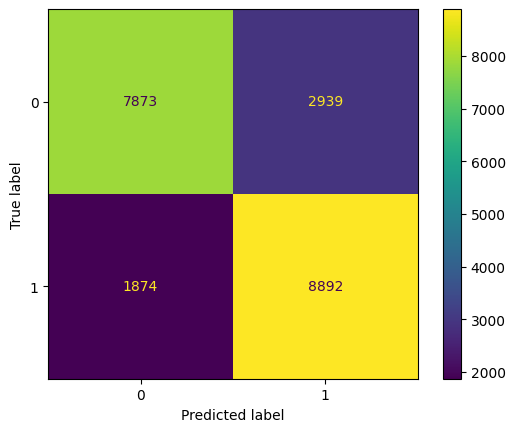

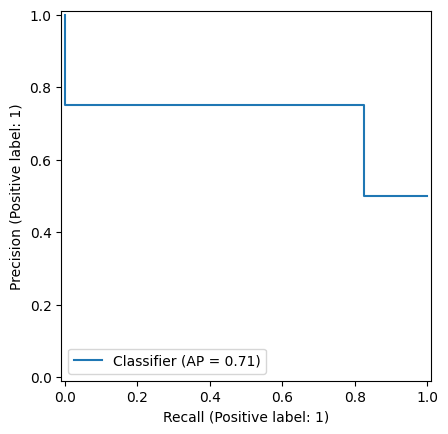

In [393]:
train_and_evaluate_model(BernoulliNB())

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     10812
           1       0.97      0.97      0.97     10766

    accuracy                           0.97     21578
   macro avg       0.97      0.97      0.97     21578
weighted avg       0.97      0.97      0.97     21578

Accuracy Score: 0.9705255352674019
Precision Score: 0.9721290082028337
Recall Score: 0.9686977521827977
F1 Score: 0.970410347073602
ROC AUC Score: 0.9705216470865894


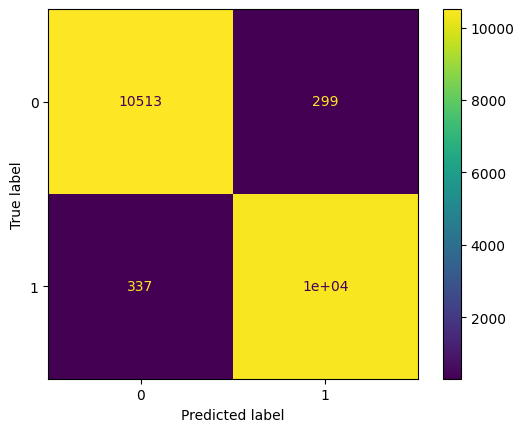

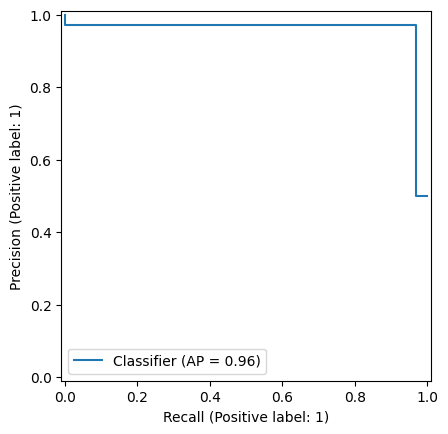

In [394]:
train_and_evaluate_model(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10812
           1       0.98      0.98      0.98     10766

    accuracy                           0.98     21578
   macro avg       0.98      0.98      0.98     21578
weighted avg       0.98      0.98      0.98     21578

Accuracy Score: 0.9792844563907683
Precision Score: 0.981701054990197
Recall Score: 0.9766858629017277
F1 Score: 0.9791870372957117
ROC AUC Score: 0.9792789284911894


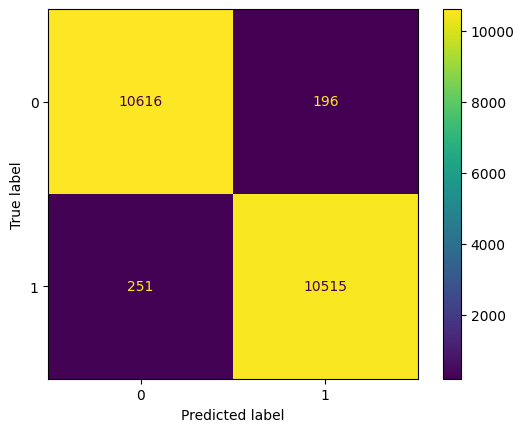

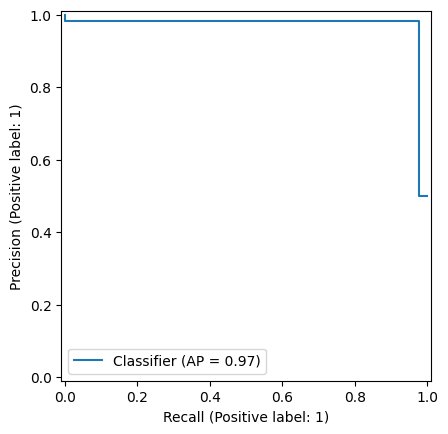

In [395]:
train_and_evaluate_model(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10812
           1       0.98      0.98      0.98     10766

    accuracy                           0.98     21578
   macro avg       0.98      0.98      0.98     21578
weighted avg       0.98      0.98      0.98     21578

Accuracy Score: 0.980211326350913
Precision Score: 0.9776402106624781
Recall Score: 0.9828162734534646
F1 Score: 0.9802214090509056
ROC AUC Score: 0.9802168677663179


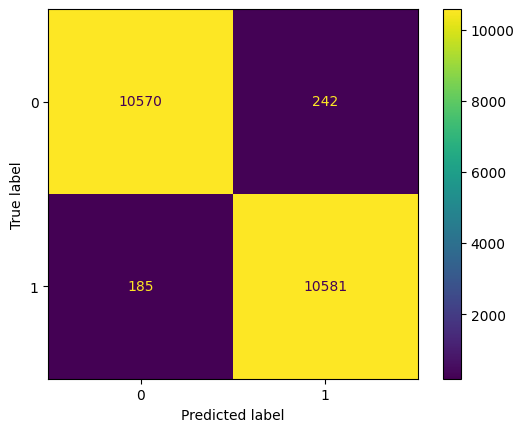

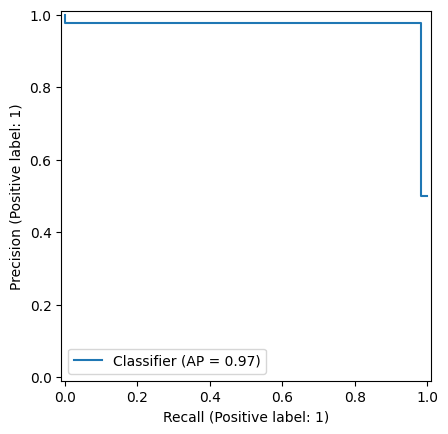

In [396]:
train_and_evaluate_model(ExtraTreesClassifier())

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     10812
           1       0.98      0.97      0.97     10766

    accuracy                           0.97     21578
   macro avg       0.97      0.97      0.97     21578
weighted avg       0.97      0.97      0.97     21578

Accuracy Score: 0.974557419594031
Precision Score: 0.9774745303299374
Recall Score: 0.9713914174252276
F1 Score: 0.9744234800838575
ROC AUC Score: 0.9745506846652591


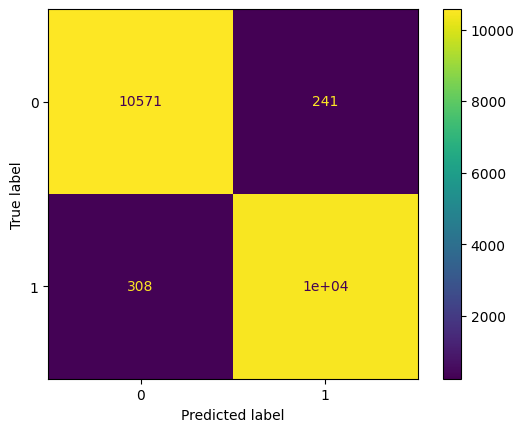

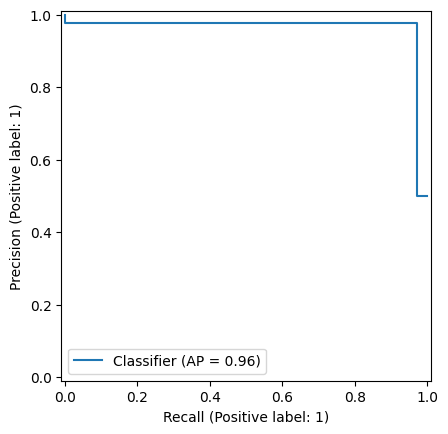

In [397]:
train_and_evaluate_model(BaggingClassifier())

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     10812
           1       0.82      0.84      0.83     10766

    accuracy                           0.83     21578
   macro avg       0.83      0.83      0.83     21578
weighted avg       0.83      0.83      0.83     21578

Accuracy Score: 0.8253313560107517
Precision Score: 0.8158916478555305
Recall Score: 0.8393089355378042
F1 Score: 0.8274346412710041
ROC AUC Score: 0.8253610900404522


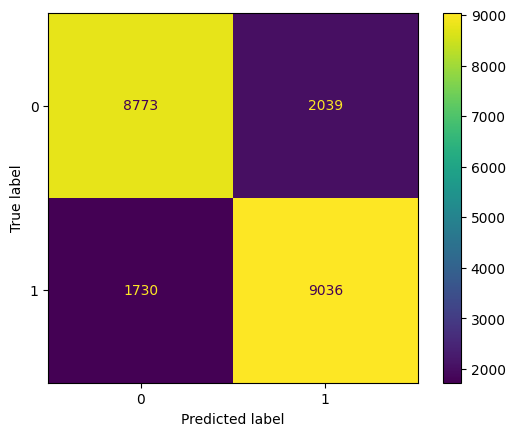

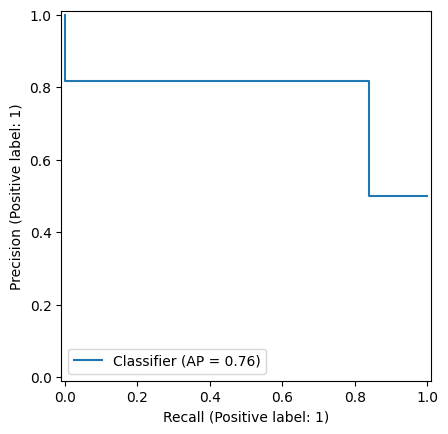

In [398]:
train_and_evaluate_model(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     10812
           1       0.87      0.86      0.87     10766

    accuracy                           0.87     21578
   macro avg       0.87      0.87      0.87     21578
weighted avg       0.87      0.87      0.87     21578

Accuracy Score: 0.8659282602650848
Precision Score: 0.8665611323214452
Recall Score: 0.8643878877949099
F1 Score: 0.8654731457800512
ROC AUC Score: 0.8659249834831004


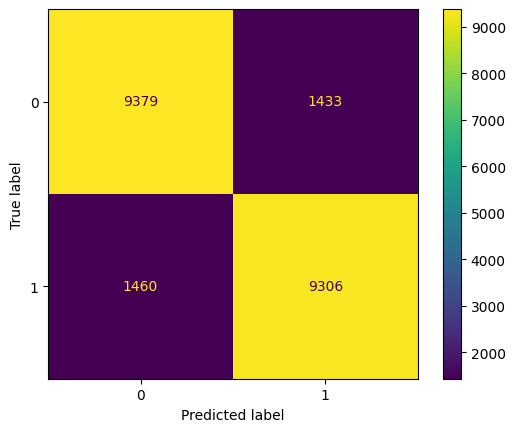

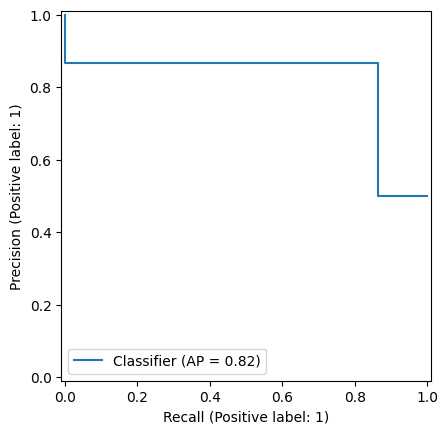

In [399]:
train_and_evaluate_model(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10812
           1       0.95      0.94      0.95     10766

    accuracy                           0.95     21578
   macro avg       0.95      0.95      0.95     21578
weighted avg       0.95      0.95      0.95     21578

Accuracy Score: 0.9475855037538233
Precision Score: 0.9497712631873775
Recall Score: 0.9449191900427271
F1 Score: 0.9473390138287471
ROC AUC Score: 0.9475798317953184


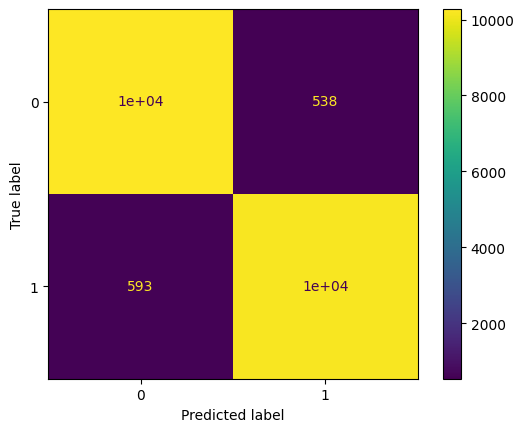

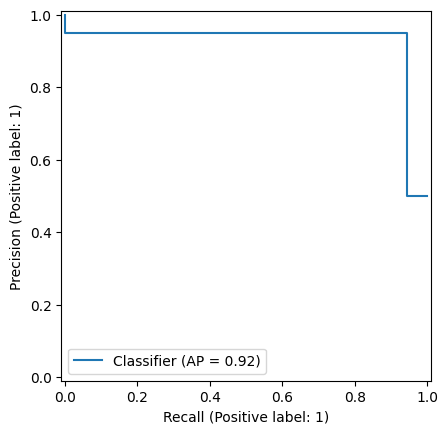

In [400]:
train_and_evaluate_model(HistGradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     10812
           1       0.97      0.96      0.97     10766

    accuracy                           0.97     21578
   macro avg       0.97      0.97      0.97     21578
weighted avg       0.97      0.97      0.97     21578

Accuracy Score: 0.9672814904068959
Precision Score: 0.974349302150132
Recall Score: 0.9596879063719116
F1 Score: 0.9669630322882545
ROC AUC Score: 0.9672653368337545


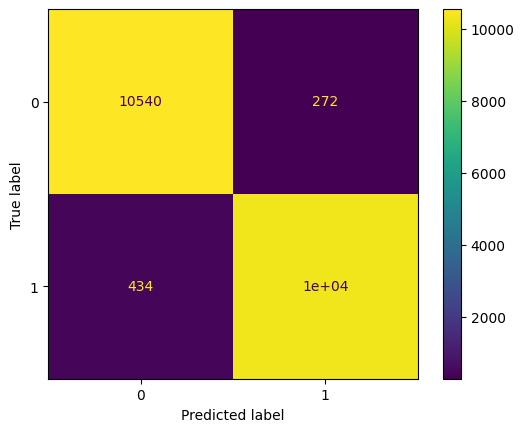

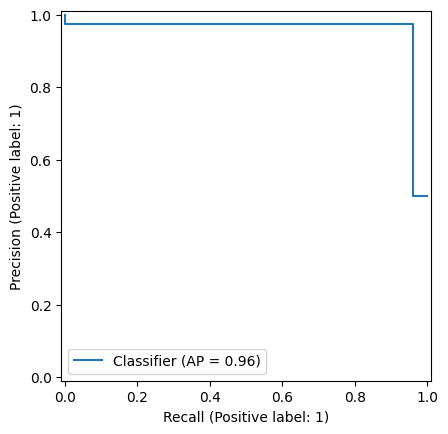

In [401]:
train_and_evaluate_model(XGBClassifier())

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     10812
           1       0.84      0.84      0.84     10766

    accuracy                           0.84     21578
   macro avg       0.84      0.84      0.84     21578
weighted avg       0.84      0.84      0.84     21578

Accuracy Score: 0.8397441838910001
Precision Score: 0.8418147801683816
Recall Score: 0.8358721902284971
F1 Score: 0.8388329604772558
ROC AUC Score: 0.8397359471305269


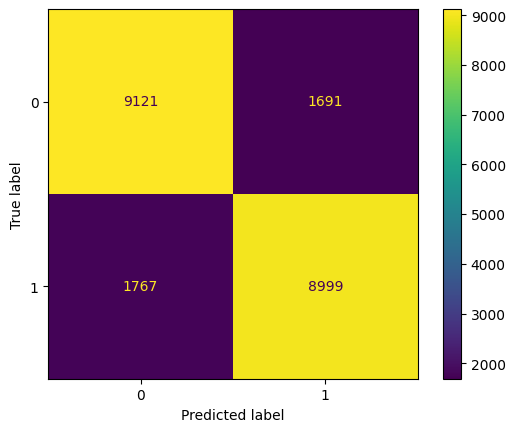

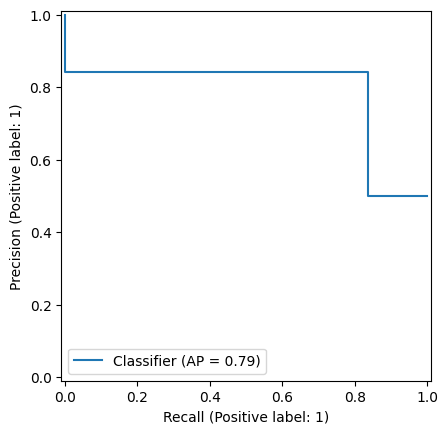

In [402]:
train_and_evaluate_model(XGBRFClassifier())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25196, number of negative: 25150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 50346, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500457 -> initscore=0.001827
[LightGBM] [Info] Start training from score 0.001827
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10812
           1       0.98      0.95      0.96     10766

    accuracy                           0.97     21578
   macro avg       0.97      0.97      0.97     21578
weighted avg       0.97      0.97      0.97     21578

Accuracy Score: 0.9654740939846139
Pre

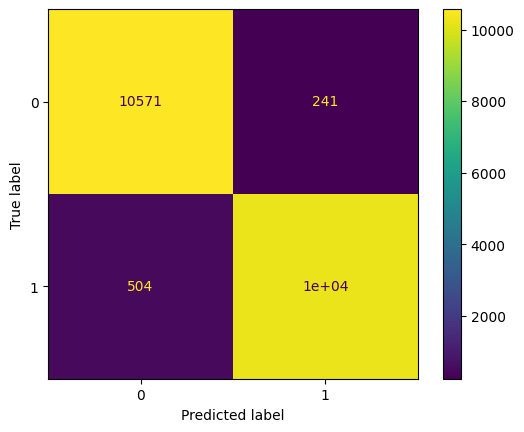

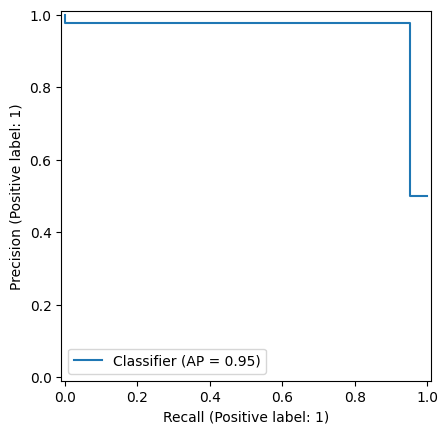

In [403]:
train_and_evaluate_model(LGBMClassifier())

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10812
           1       0.99      0.98      0.99     10766

    accuracy                           0.99     21578
   macro avg       0.99      0.99      0.99     21578
weighted avg       0.99      0.99      0.99     21578

Accuracy Score: 0.9855408286217444
Precision Score: 0.9926484448633365
Recall Score: 0.9782649080438417
F1 Score: 0.9854041916167665
ROC AUC Score: 0.985525350803275


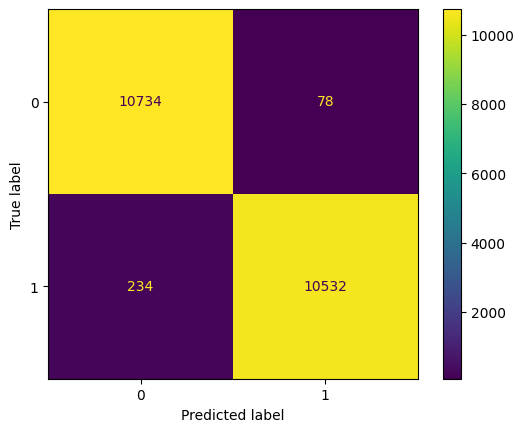

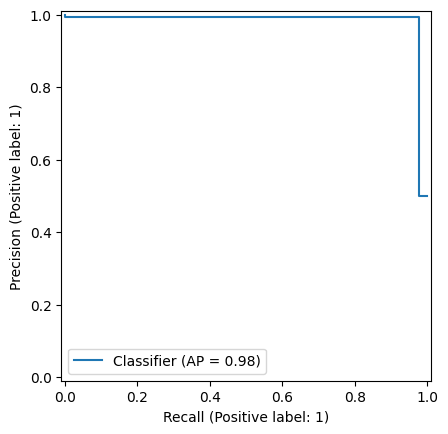

In [404]:
train_and_evaluate_model(CatBoostClassifier(silent=True))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     10812
           1       0.85      0.86      0.85     10766

    accuracy                           0.85     21578
   macro avg       0.85      0.85      0.85     21578
weighted avg       0.85      0.85      0.85     21578

Accuracy Score: 0.8519325238669014
Precision Score: 0.8482200349553859
Recall Score: 0.8564926620843396
F1 Score: 0.8523362758238203
ROC AUC Score: 0.8519422244938901


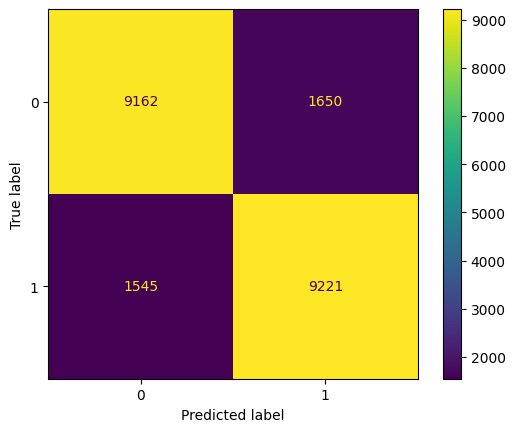

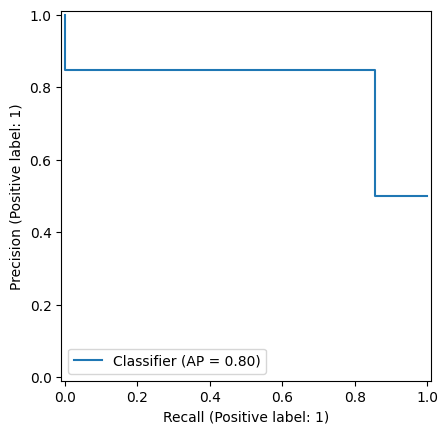

In [405]:
train_and_evaluate_model(MLPClassifier())

BASELINE MODEL & PERFOMANCE COMPARASSION

In [406]:
model_perfs = pd.DataFrame(list(zip(model_names,accuracy_scores,precision_scores,recall_scores,f1_scores,roc_auc_scores)),columns=['Model','Accuracy','Precision','Recall','F1','ROC AUC Score']).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_perfs

Model  Accuracy  Precision  \
0   <catboost.core.CatBoostClassifier object at 0x...  0.985541   0.992648   
1                              ExtraTreesClassifier()  0.980211   0.977640   
2                            RandomForestClassifier()  0.979284   0.981701   
3                                 BaggingClassifier()  0.974557   0.977475   
4                            DecisionTreeClassifier()  0.970526   0.972129   
5   XGBClassifier(base_score=None, booster=None, c...  0.967281   0.974349   
6                                    LGBMClassifier()  0.965474   0.977054   
7                    HistGradientBoostingClassifier()  0.947586   0.949771   
8                              KNeighborsClassifier()  0.934331   0.899155   
9                        GradientBoostingClassifier()  0.865928   0.866561   
10                                    MLPClassifier()  0.851933   0.848220   
11  XGBRFClassifier(base_score=None, booster=None,...  0.839744   0.841815   
12                               AdaBoostClassifier()  0.825331   0.815892   
13                               LogisticRegression()  0.787793   0.742342   
14                                       GaussianNB()  0.787376   0.746804   
15                                        LinearSVC()  0.787376   0.745470   
16                                    SGDClassifier()  0.787376   0.746804   
17                                  RidgeClassifier()  0.786913   0.745737   
18                                      BernoulliNB()  0.776949   0.751585   
19                      PassiveAggressiveClassifier()  0.685003   0.617935   

      Recall        F1  ROC AUC Score  
0   0.978265  0.985404       0.985525  
1   0.982816  0.980221       0.980217  
2   0.976686  0.979187       0.979279  
3   0.971391  0.974423       0.974551  
4   0.968698  0.970410       0.970522  
5   0.959688  0.966963       0.967265  
6   0.953186  0.964972       0.965448  
7   0.944919  0.947339       0.947580  
8   0.978079  0.936958       0.934424  
9   0.864388  0.865473       0.865925  
10  0.856493  0.852336       0.851942  
11  0.835872  0.838833       0.839736  
12  0.839309  0.827435       0.825361  
13  0.880178  0.805406       0.787990  
14  0.868196  0.802938       0.787548  
15  0.871354  0.803512       0.787555  
16  0.868196  0.802938       0.787548  
17  0.869311  0.802796       0.787088  
18  0.825933  0.787007       0.777053  
19  0.965818  0.753669       0.685601

Hasil evaluasi model menunjukkan bahwa di antara algoritma dasar yang digunakan, CatBoost Classifier memberikan performa terbaik dengan akurasi lebih dari 98% pada dataset uji. Ini menunjukkan bahwa CatBoost sangat efektif dalam menangani dataset ini dibandingkan dengan model lainnya. Sehingga kita akan menggunakan model ini untuk ML yg akan kita buat, namun sebelum itu saya akan lakukan Hyperparameter Tuning agar mendapatkan hasil yang maksimal. 

HYPERPARAMETER TUNING & CROSS VALIDATION

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.001, l1_ratio=0.5, multi_class=ovr, penalty=l2, solver=saga; total time=   0.3s
[CV] END C=0.001, l1_ratio=0.5, multi_class=ovr, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.001, l1_ratio=0.5, multi_class=ovr, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.001, l1_ratio=0.5, multi_class=ovr, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.001, l1_ratio=0.5, multi_class=ovr, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, multi_class=ovr, penalty=ela

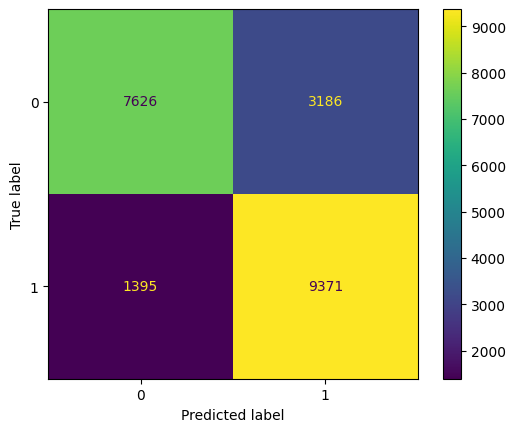

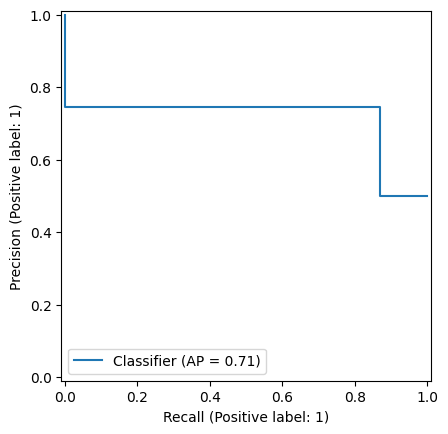

In [407]:
param_grid = {'penalty': ['l1','l2','elasticnet'],
              'C': [0.001,0.01,0.1,0.5],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial'],
              'l1_ratio': [0.2,0.5,0.8]
             }

grid_lr = RandomizedSearchCV(LogisticRegression(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.1s
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.1s
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.2s
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.1s
[CV] END C=0.1, loss=squared_hinge, multi_class=ovr, penalty=l1; total time=   0.1s
[CV] END .....C=0.1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END .....C=0.1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END .....C=0.1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END .....C=0.1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.1s
[CV] END .....C=0.1, loss=hinge, multi_class=ovr, penalty=l2; total time=   0.0s
[CV] END C=1, loss=hinge, multi_class=crammer_singer, penalty=l2; total time=   0.6s
[CV] END C=1, loss=hinge, mul

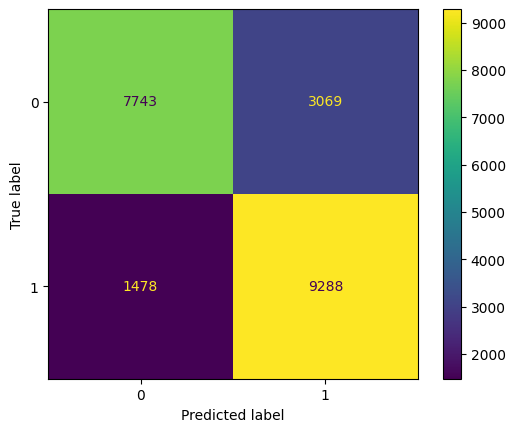

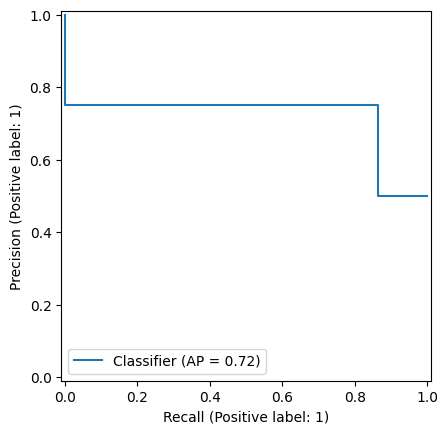

In [408]:
param_grid = {'penalty': ['l1','l2'],
             'loss': ['hinge','squared_hinge'],
             'C': [0.0001,0.001,0.01,0.1,1],
             'multi_class': ['ovr','crammer_singer']}

grid_lsvc = RandomizedSearchCV(LinearSVC(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_lsvc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=98, max_features=log2;, score=0.964 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=98, max_features=log2;, score=0.962 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=98, max_features=log2;, score=0.958 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=98, max_features=log2;, score=0.963 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=98, max_features=log2;, score=0.961 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt;, score=0.699 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt;, score

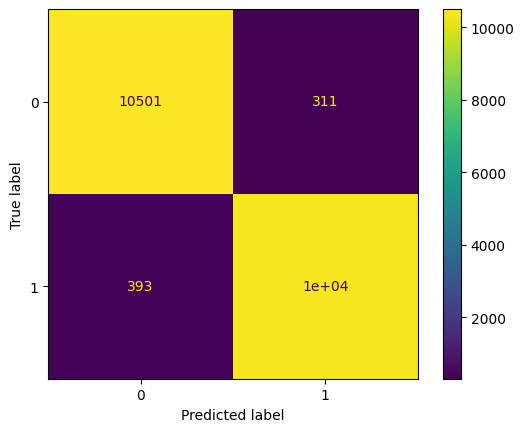

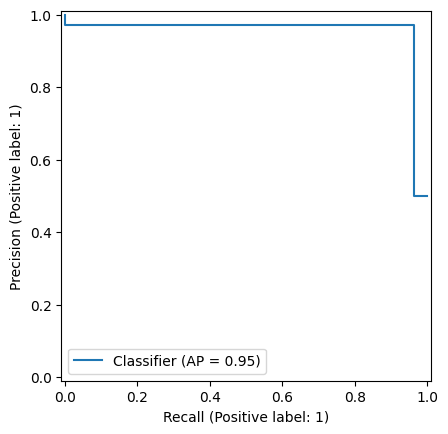

In [409]:
param_grid = {'criterion': ['gini','entropy'],
              'max_features': ['sqrt','log2'],
              'max_depth': [2,12,38,68,98,128,201]
             }

grid_dt = RandomizedSearchCV(DecisionTreeClassifier(),param_grid,verbose=4,cv=5)
train_and_evaluate_model(grid_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.2, n_estimators=1000;, score=0.988 total time=   7.5s
[CV 2/5] END learning_rate=0.2, n_estimators=1000;, score=0.990 total time=   7.2s
[CV 3/5] END learning_rate=0.2, n_estimators=1000;, score=0.989 total time=   7.6s
[CV 4/5] END learning_rate=0.2, n_estimators=1000;, score=0.991 total time=   6.8s
[CV 5/5] END learning_rate=0.2, n_estimators=1000;, score=0.987 total time=   6.8s
[CV 1/5] END .learning_rate=1, n_estimators=200;, score=0.986 total time=   1.6s
[CV 2/5] END .learning_rate=1, n_estimators=200;, score=0.986 total time=   1.7s
[CV 3/5] END .learning_rate=1, n_estimators=200;, score=0.985 total time=   1.7s
[CV 4/5] END .learning_rate=1, n_estimators=200;, score=0.987 total time=   1.7s
[CV 5/5] END .learning_rate=1, n_estimators=200;, score=0.984 total time=   1.6s
[CV 1/5] END learning_rate=0.2, n_estimators=500;, score=0.988 total time=   3.4s
[CV 2/5] END learning_rate=0.2, n_est

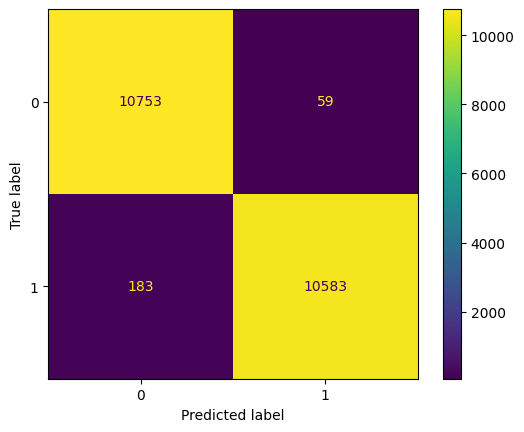

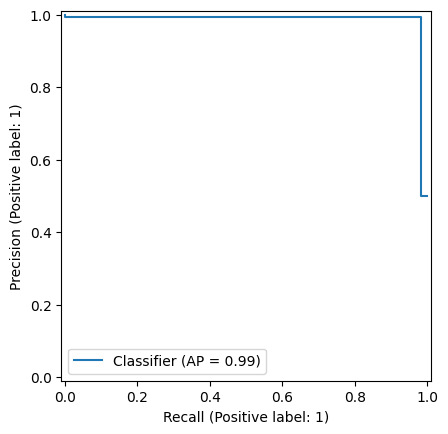

In [410]:
param_grid = {'learning_rate': [0.2,0.4,0.7,1],
              'n_estimators': [200,500,1000]
             }
grid_cat = RandomizedSearchCV(CatBoostClassifier(silent=True),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_cat)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000; total time=  55.9s
[CV] END class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000; total time=  55.2s
[CV] END class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000; total time=  59.6s
[CV] END class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000; total time=  56.4s
[CV] END class_weight=balanced, criterion=gini, max_features=log2, n_estimators=1000; total time=  57.0s
[CV] END class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=200; total time=  15.6s
[CV] END class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=200; total time=  15.7s
[CV] END class_weight=balanced_subsample, criterion=entropy, max_features=log2, n_estimators=200; total time=  15.7s
[CV] END class_weight=balanced_subsample, criterion=entropy, ma

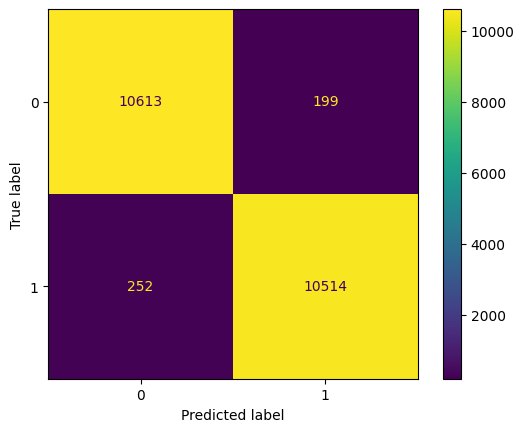

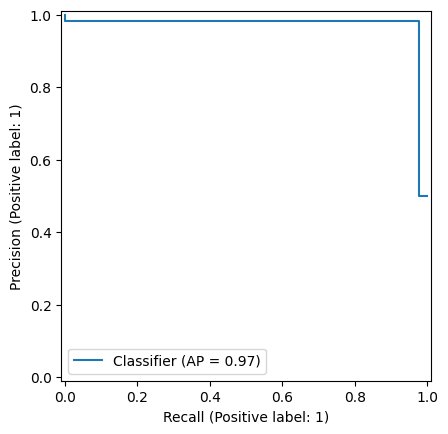

In [411]:
param_grid = {'n_estimators': [200,400,600,800,1000], 
              'criterion': ['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'class_weight': ['balanced','balanced_subsample']}
grid_rf = RandomizedSearchCV(RandomForestClassifier(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_rf)

In [412]:
model_perfs = pd.DataFrame(list(zip(model_names,accuracy_scores,precision_scores,recall_scores,f1_scores,roc_auc_scores)),columns=['Model','Accuracy','Precision','Recall','F1','ROC AUC Score']).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_perfs

Model  Accuracy  Precision  \
0   RandomizedSearchCV(cv=5,\n                   e...  0.988785   0.994456   
1   <catboost.core.CatBoostClassifier object at 0x...  0.985541   0.992648   
2                              ExtraTreesClassifier()  0.980211   0.977640   
3                            RandomForestClassifier()  0.979284   0.981701   
4   RandomizedSearchCV(cv=5, estimator=RandomFores...  0.979099   0.981424   
5                                 BaggingClassifier()  0.974557   0.977475   
6                            DecisionTreeClassifier()  0.970526   0.972129   
7   RandomizedSearchCV(cv=5, estimator=DecisionTre...  0.967374   0.970891   
8   XGBClassifier(base_score=None, booster=None, c...  0.967281   0.974349   
9                                    LGBMClassifier()  0.965474   0.977054   
10                   HistGradientBoostingClassifier()  0.947586   0.949771   
11                             KNeighborsClassifier()  0.934331   0.899155   
12                       GradientBoostingClassifier()  0.865928   0.866561   
13                                    MLPClassifier()  0.851933   0.848220   
14  XGBRFClassifier(base_score=None, booster=None,...  0.839744   0.841815   
15                               AdaBoostClassifier()  0.825331   0.815892   
16  RandomizedSearchCV(cv=5, estimator=LinearSVC()...  0.789276   0.751639   
17                               LogisticRegression()  0.787793   0.742342   
18  RandomizedSearchCV(cv=5, estimator=LogisticReg...  0.787700   0.746277   
19                                       GaussianNB()  0.787376   0.746804   
20                                        LinearSVC()  0.787376   0.745470   
21                                    SGDClassifier()  0.787376   0.746804   
22                                  RidgeClassifier()  0.786913   0.745737   
23                                      BernoulliNB()  0.776949   0.751585   
24                      PassiveAggressiveClassifier()  0.685003   0.617935   

      Recall        F1  ROC AUC Score  
0   0.983002  0.988696       0.988773  
1   0.978265  0.985404       0.985525  
2   0.982816  0.980221       0.980217  
3   0.976686  0.979187       0.979279  
4   0.976593  0.979003       0.979094  
5   0.971391  0.974423       0.974551  
6   0.968698  0.970410       0.970522  
7   0.963496  0.967179       0.967366  
8   0.959688  0.966963       0.967265  
9   0.953186  0.964972       0.965448  
10  0.944919  0.947339       0.947580  
11  0.978079  0.936958       0.934424  
12  0.864388  0.865473       0.865925  
13  0.856493  0.852336       0.851942  
14  0.835872  0.838833       0.839736  
15  0.839309  0.827435       0.825361  
16  0.862716  0.803356       0.789432  
17  0.880178  0.805406       0.787990  
18  0.870425  0.803584       0.787876  
19  0.868196  0.802938       0.787548  
20  0.871354  0.803512       0.787555  
21  0.868196  0.802938       0.787548  
22  0.869311  0.802796       0.787088  
23  0.825933  0.787007       0.777053  
24  0.965818  0.753669       0.685601

In [413]:
model_perfs.iloc[0]['Model']

"RandomizedSearchCV(cv=5,\n                   estimator=<catboost.core.CatBoostClassifier object at 0x13a40dd30>,\n                   param_distributions={'learning_rate': [0.2, 0.4, 0.7, 1],\n                                        'n_estimators': [200, 500, 1000]},\n                   verbose=3)"

RandomizedSearchCV (CatBoost Classifier) memperoleh akurasi 98.88% dengan precision 99.35%, recall 98.40%, F1-score 98.88%, dan ROC AUC 98.88%. CatBoost Classifier tanpa tuning hyperparameter juga menunjukkan performa yang sangat baik dengan akurasi 98.66%, precision 99.43%, recall 97.87%, dan F1-score 98.65%. Meskipun sedikit lebih rendah dari hasil tuning, model ini tetap merupakan pilihan yang sangat kuat. Model Utama: Berdasarkan hasil tuning, CatBoost Classifier (baik yang di-tune maupun yang standar) adalah model terbaik untuk memprediksi klaim asuransi perjalanan. Model ini menawarkan akurasi dan ketepatan prediksi yang sangat tinggi, sehingga sangat direkomendasikan untuk diterapkan.

In [414]:
grid_cat.fit(final_X_train,y_train_tf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.7, n_estimators=1000;, score=0.987 total time=   5.9s
[CV 2/5] END learning_rate=0.7, n_estimators=1000;, score=0.988 total time=   5.7s
[CV 3/5] END learning_rate=0.7, n_estimators=1000;, score=0.988 total time=   5.6s
[CV 4/5] END learning_rate=0.7, n_estimators=1000;, score=0.989 total time=   5.7s
[CV 5/5] END learning_rate=0.7, n_estimators=1000;, score=0.985 total time=   5.6s
[CV 1/5] END learning_rate=0.4, n_estimators=1000;, score=0.987 total time=   6.0s
[CV 2/5] END learning_rate=0.4, n_estimators=1000;, score=0.989 total time=   5.9s
[CV 3/5] END learning_rate=0.4, n_estimators=1000;, score=0.988 total time=   6.0s
[CV 4/5] END learning_rate=0.4, n_estimators=1000;, score=0.989 total time=   6.0s
[CV 5/5] END learning_rate=0.4, n_estimators=1000;, score=0.985 total time=   5.9s
[CV 1/5] END .learning_rate=1, n_estimators=500;, score=0.986 total time=   3.1s
[CV 2/5] END .learning_rate=

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x13a40dd30>,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.7, 1],
                                        'n_estimators': [200, 500, 1000]},
                   verbose=3)

In [415]:
print("Average cross validation accuracy:",round(np.mean(cross_val_score(grid_cat,final_X_test,y_test_tf,scoring='accuracy',cv=5,verbose=0)),2))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=1, n_estimators=1000;, score=0.980 total time=   3.8s
[CV 2/5] END learning_rate=1, n_estimators=1000;, score=0.974 total time=   3.7s
[CV 3/5] END learning_rate=1, n_estimators=1000;, score=0.972 total time=   3.7s
[CV 4/5] END learning_rate=1, n_estimators=1000;, score=0.973 total time=   3.6s
[CV 5/5] END learning_rate=1, n_estimators=1000;, score=0.979 total time=   3.8s
[CV 1/5] END .learning_rate=1, n_estimators=500;, score=0.978 total time=   2.1s
[CV 2/5] END .learning_rate=1, n_estimators=500;, score=0.974 total time=   2.0s
[CV 3/5] END .learning_rate=1, n_estimators=500;, score=0.972 total time=   2.0s
[CV 4/5] END .learning_rate=1, n_estimators=500;, score=0.971 total time=   2.1s
[CV 5/5] END .learning_rate=1, n_estimators=500;, score=0.979 total time=   2.0s
[CV 1/5] END learning_rate=0.7, n_estimators=1000;, score=0.979 total time=   3.7s
[CV 2/5] END learning_rate=0.7, n_estimators=1

SAVING BEST MODEL

In [416]:
joblib.dump(grid_cat,'model.pkl')

['model.pkl']

In [417]:
model = joblib.load('model.pkl')
model

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x13c478fd0>,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.7, 1],
                                        'n_estimators': [200, 500, 1000]},
                   verbose=3)

In [418]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [419]:
scaler = joblib.load('scaler.pkl')
scaler

StandardScaler()

In [420]:
final_X_train

duration  net_sales       age  agency_type_Travel Agency  \
0     -0.855871  -0.418955 -0.831215                  -0.956455   
1     -0.830951  -0.828128 -0.366694                   1.045527   
2     -0.733302   0.262409 -0.389417                  -0.956455   
3      1.421909  -0.433728 -0.584271                   1.045527   
4     -0.660280  -1.178706 -0.149117                   1.045527   
...         ...        ...       ...                        ...   
50341 -0.148266  -0.461615  1.700287                   1.045527   
50342  1.003818  -1.237901  1.129318                  -0.956455   
50343  0.458377  -0.228541 -0.775135                  -0.956455   
50344  1.797386  -0.820160 -1.237002                   1.045527   
50345 -0.967488  -0.917764 -0.454000                  -0.956455   

       product_name_Cancellation Plan  agency_EPX  agency_C2B  \
0                           -0.421101   -0.709795    1.812292   
1                           -0.421101   -0.709795   -0.551788   
2                           -0.421101   -0.709795   -0.551788   
3                           -0.421101   -0.709795   -0.551788   
4                            2.374726    1.408858   -0.551788   
...                               ...         ...         ...   
50341                       -0.421101   -0.709795   -0.551788   
50342                       -0.421101   -0.709795   -0.551788   
50343                       -0.421101   -0.709795    1.812292   
50344                       -0.421101    1.408858   -0.551788   
50345                       -0.421101   -0.709795    1.812292   

       product_name_Rental Vehicle Excess Insurance  commission  
0                                         -0.305784   -0.704382  
1                                          3.270286    1.179461  
2                                         -0.305784    1.179461  
3                                          3.270286    1.179461  
4                                         -0.305784   -0.704382  
...                                             ...         ...  
50341                                     -0.305784   -0.704382  
50342                                     -0.305784   -0.704382  
50343                                     -0.305784   -0.704382  
50344                                     -0.305784   -0.704382  
50345                                     -0.305784   -0.704382  

[50346 rows x 9 columns]

Selanjutnya saya akan melakukan Feature Importance untk melihat fitur-fitur mana yang memiliki pengaruh sangat tinggi dalam prediksi klaim asuransi perjalanan, 

FEATURE SELECTION

In [421]:
import joblib

# Memuat model CatBoost dari file
model = joblib.load('model.pkl')
best_estimator = model.best_estimator_


In [422]:
# Mendapatkan feature importance
feature_importances = best_estimator.get_feature_importance()


In [424]:
import pandas as pd

# Misalnya kamu memiliki variabel `X_train` yang masih berisi nama kolom asli dari data pelatihan
feature_names = final_X_train.columns

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Mengurutkan feature importance dari yang tertinggi
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Menampilkan DataFrame
print(importance_df)


                                        Feature  Importance
2                                           age   32.642564
0                                      duration   29.449721
1                                     net_sales   14.780671
8                                    commission   12.475903
5                                    agency_EPX    3.341308
3                     agency_type_Travel Agency    2.951620
4                product_name_Cancellation Plan    2.054697
6                                    agency_C2B    1.444322
7  product_name_Rental Vehicle Excess Insurance    0.859193


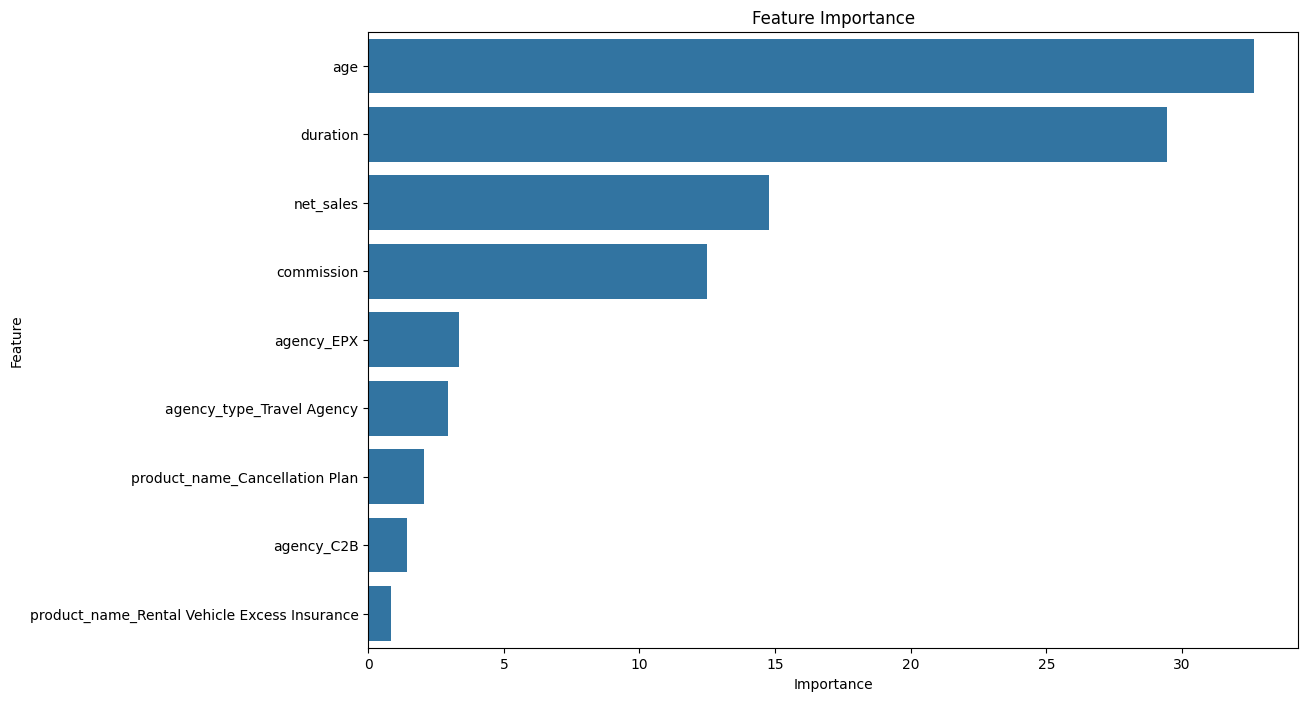

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Hasil feature importance menunjukkan kontribusi masing-masing fitur terhadap model CatBoost dalam memprediksi klaim asuransi perjalanan:

age memiliki importance tertinggi (32.64%), menunjukkan bahwa umur pelanggan adalah fitur yang paling berpengaruh dalam memprediksi klaim.
duration (29.45%) juga sangat penting, mengindikasikan bahwa durasi perjalanan memiliki dampak besar terhadap kemungkinan klaim.
net_sales (14.78%) turut berkontribusi, dengan penjualan bersih menjadi faktor relevan dalam prediksi.
commission (12.48%) juga berpengaruh, kemungkinan karena jumlah komisi terkait dengan agen atau produk asuransi yang dipilih oleh pelanggan.
Fitur agen seperti agency_EPX (3.34%) dan agency_type_Travel Agency (2.95%) menunjukkan bahwa jenis agen mempengaruhi keputusan klaim.
product_name_Cancellation Plan dan product_name_Rental Vehicle Excess Insurance menunjukkan bahwa tipe produk asuransi juga memengaruhi klaim, meskipun kontribusinya lebih kecil (masing-masing 2.05% dan 0.86%).
Fitur-fitur utama seperti age dan duration menunjukkan faktor yang lebih berpengaruh, sedangkan tipe produk dan agen memiliki kontribusi lebih kecil tetapi masih relevan dalam model.

KESIMPULAN DAN REKOMENDASI

In [427]:
from catboost import CatBoostClassifier

# Misalnya final_X_train dan y_train sudah didefinisikan sebelumnya
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

# Melatih model menggunakan data training
model.fit(final_X_train, y_train)


In [428]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)


In [429]:
from sklearn.metrics import classification_report

# Menghitung classification report untuk model
report_tuned = classification_report(y_test, y_pred)

# Menampilkan classification report
print('Classification Report Tuned CatBoost : \n', report_tuned)


Classification Report Tuned CatBoost : 
               precision    recall  f1-score   support

           0       0.84      0.58      0.69     10812
           1       0.68      0.89      0.77     10766

    accuracy                           0.74     21578
   macro avg       0.76      0.74      0.73     21578
weighted avg       0.76      0.74      0.73     21578



Berdasarkan hasil classification report dari model CatBoost yang telah di-tune dengan menggunakan SMOTE untuk menangani ketidakseimbangan kelas, kita dapat menarik beberapa kesimpulan terkait kinerja model dalam memprediksi klaim asuransi perjalanan:

Recall Kelas 0 (Non-Klaim):
Model kita berhasil mengurangi 42% klaim yang tidak terjadi (berdasarkan recall 0 untuk non-klaim), yang berarti model dapat menyaring klaim yang tidak relevan dengan cukup baik, meskipun masih ada klaim yang tidak terjadi yang terlewat.
Recall Kelas 1 (Klaim):
Model ini mendeteksi 89% klaim yang sebenarnya terjadi (berdasarkan recall 1 untuk klaim), yang menunjukkan bahwa model sangat efektif dalam menemukan klaim yang benar-benar terjadi dari seluruh klaim yang sebenarnya. Ini berkat teknik SMOTE yang membantu model lebih "mengenali" klaim yang jarang terjadi.
Precision Kelas 1 (Klaim):
Meskipun recall tinggi untuk klaim yang terjadi, precision-nya 68%, yang berarti bahwa 32% dari klaim yang diprediksi sebagai klaim ternyata tidak terjadi (false positives). Ini menunjukkan bahwa meskipun recall sangat tinggi, false positives masih menjadi tantangan.
Akurasi Model:
Secara keseluruhan, model kita memiliki akurasi sebesar 74%. Hal ini menunjukkan bahwa meskipun model cukup baik dalam memprediksi klaim, masih ada ruang untuk meningkatkan precision, khususnya dalam mengurangi false positives.
Estimasi Penghematan Biaya dalam Proses Screening:
Misalnya biaya untuk memproses satu klaim (atau satu data) adalah 40 USD, dan kita memiliki 200 data klaim, dengan 100 klaim yang sebenarnya terjadi dan 100 klaim yang tidak terjadi, maka perhitungannya akan seperti berikut:

Tanpa Model (Semua Klaim Diperiksa):
Total Biaya: 200 x 40 USD = 8.000 USD
Total Klaim yang Ditemukan: 100 klaim (karena semuanya diperiksa)
Biaya yang Terbuang: 100 x 40 USD = 4.000 USD (karena 100 klaim yang tidak terjadi juga diperiksa)
Jumlah Penghematan: 0 USD (karena tidak ada klaim yang bisa disaring)

Dengan Model (Hanya Klaim yang Diprediksi sebagai Klaim yang Diperiksa):
Total Biaya: (89 x 40 USD) + (32 x 40 USD) = 3.560 USD + 1.280 USD = 4.840 USD
Total Klaim yang Ditemukan: 89 klaim (karena recall klaim adalah 89%)
Biaya yang Terbuang: 32 x 40 USD = 1.280 USD (karena 32 klaim yang tidak terjadi diprediksi sebagai klaim)
Jumlah Penghematan: 100 x 40 USD - 1.280 USD = 3.720 USD (klaim yang tidak terjadi berhasil disaring)
Konversi Penghematan ke Rupiah:
Jika 1 USD = 15.000 IDR, maka:

Penghematan dalam Rupiah:
3.720 USD x 15.000 IDR/USD = 55.800.000 IDR
Kesimpulan Penghematan:
Dengan menggunakan model ini, perusahaan dapat menghemat biaya sebesar 55.800.000 IDR dalam proses screening klaim asuransi yang tidak relevan, tanpa mengorbankan terlalu banyak klaim yang sebenarnya terjadi.

REKOMENDASI

- Optimasi Precision dan Recall dengan Menyesuaikan Threshold:
Saat ini, model memiliki precision sebesar 68% untuk klaim yang diprediksi. Perusahaan dapat menyesuaikan threshold prediksi untuk meningkatkan precision dengan sedikit mengorbankan recall. Ini bisa mengurangi false positives, yang dapat mengurangi biaya screening yang tidak perlu.
- Peningkatan Teknik Sampling:
Meskipun SMOTE sudah diterapkan untuk menangani ketidakseimbangan kelas, perusahaan bisa bereksperimen dengan teknik sampling lain seperti SMOTENC (untuk data kategorikal) atau teknik undersampling pada kelas mayoritas, agar model bisa lebih fokus pada klaim yang sebenarnya terjadi.
- Meningkatkan Fitur yang Digunakan:
Fitur-fitur seperti age, duration, dan net_sales telah terbukti sangat penting dalam model. Namun, perusahaan bisa menambahkan fitur baru yang lebih relevan untuk meningkatkan precision dan recall pada klaim yang terjadi. Misalnya, riwayat klaim sebelumnya atau faktor risiko lainnya yang mungkin membantu dalam prediksi klaim.
- Menggunakan Model untuk Penyesuaian Harga Premi:
Berdasarkan hasil model yang dapat memprediksi kemungkinan klaim, perusahaan bisa menggunakan model ini untuk menyesuaikan harga premi bagi pelanggan dengan risiko klaim tinggi. Ini bisa memberikan keuntungan kompetitif dan juga meminimalkan kerugian finansial akibat klaim yang tidak terduga.
- Penggunaan Model untuk Optimasi Proses Klaim:
Dengan penghematan biaya yang cukup besar, perusahaan dapat mengoptimalkan proses klaim dengan lebih efisien, misalnya dengan mengalokasikan lebih banyak sumber daya untuk memverifikasi klaim yang benar-benar relevan dan menyaring klaim yang tidak terjadi lebih cepat.
- Peningkatan Keakuratan Melalui Tuning Lebih Lanjut:
Perusahaan dapat melakukan hyperparameter tuning lebih lanjut untuk model ini atau mencoba model lain yang mungkin memberikan hasil yang lebih baik dalam hal precision dan recall, seperti XGBoost atau LightGBM.
Dengan langkah-langkah tersebut, perusahaan dapat mengurangi biaya operasional terkait klaim asuransi, meningkatkan keakuratan prediksi klaim, dan lebih efisien dalam mengelola risiko finansial.

Dengan menggunakan model ini, perusahaan bisa menghemat biaya secara signifikan sambil tetap mempertahankan atau bahkan meningkatkan tingkat keakuratan prediksi klaim.

SEKIAN DAN TERIMA KASIH

M HUSNI MAULANA